In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


from sklearn.preprocessing import LabelEncoder



from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('uber_expl.csv')
#df_onehot = pd.read_csv('uber_expl_onehot.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329140 entries, 0 to 329139
Data columns (total 17 columns):
Unnamed: 0          329140 non-null int64
distance            329140 non-null float64
cab_type            329140 non-null object
destination         329140 non-null object
source              329140 non-null object
price               329140 non-null float64
surge_multiplier    329140 non-null float64
name                329140 non-null object
date                329140 non-null object
hour                329140 non-null int64
minute              329140 non-null int64
temp                329140 non-null float64
clouds              329140 non-null float64
pressure            329140 non-null float64
rain                329140 non-null float64
humidity            329140 non-null float64
wind                329140 non-null float64
dtypes: float64(9), int64(3), object(5)
memory usage: 42.7+ MB


In [5]:
df = df.drop(['Unnamed: 0', 'cab_type','surge_multiplier', 'minute'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329140 entries, 0 to 329139
Data columns (total 13 columns):
distance       329140 non-null float64
destination    329140 non-null object
source         329140 non-null object
price          329140 non-null float64
name           329140 non-null object
date           329140 non-null object
hour           329140 non-null int64
temp           329140 non-null float64
clouds         329140 non-null float64
pressure       329140 non-null float64
rain           329140 non-null float64
humidity       329140 non-null float64
wind           329140 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 32.6+ MB


In [7]:
df_ds_source = df.copy()

In [8]:
df_ds_source

distance destination     source  price       name        date  hour  \
0           1.11    West End  North End   12.0     UberXL  2018-11-30    22   
1           1.11    West End  North End   16.0      Black  2018-12-13    10   
2           1.11    West End  North End    7.5      UberX  2018-12-13    19   
3           1.11    West End  North End    7.5        WAV  2018-12-16    23   
4           1.11    West End  North End   26.0  Black SUV  2018-12-14     0   
...          ...         ...        ...    ...        ...         ...   ...   
329135      1.00   North End   West End    9.5        WAV  2018-12-01    23   
329136      1.00   North End   West End   13.0     UberXL  2018-12-01    23   
329137      1.00   North End   West End    9.5      UberX  2018-12-01    23   
329138      1.00   North End   West End   27.0  Black SUV  2018-12-01    23   
329139      1.00   North End   West End   10.0   UberPool  2018-12-01    23   

         temp  clouds  pressure    rain  humidity   wind  
0       38.65    0.96   1017.23  0.0000      0.65   3.13  
1       20.12    0.43   1031.07  0.0000      0.64   3.88  
2       32.75    0.51   1033.75  0.0000      0.57   1.90  
3       42.36    1.00   1012.15  0.2088      0.77  11.46  
4       30.07    0.69   1034.97  0.0000      0.68   1.98  
...       ...     ...       ...     ...       ...    ...  
329135  36.69    0.41   1023.64  0.0000      0.76   2.51  
329136  36.69    0.41   1023.64  0.0000      0.76   2.51  
329137  36.69    0.41   1023.64  0.0000      0.76   2.51  
329138  36.69    0.41   1023.64  0.0000      0.76   2.51  
329139  36.69    0.41   1023.64  0.0000      0.76   2.51  

[329140 rows x 13 columns]

In [9]:
def ds_source(source, destination):
    
    
    source_desti = source +"_"+ destination
    
    
    return source_desti
    

In [10]:
df_ds_source["new_ds_source"] = ds_source(df_ds_source['source'],
                                          df_ds_source['destination'])

In [11]:
df_ds_source.head(3)

distance destination     source  price    name        date  hour   temp  \
0      1.11    West End  North End   12.0  UberXL  2018-11-30    22  38.65   
1      1.11    West End  North End   16.0   Black  2018-12-13    10  20.12   
2      1.11    West End  North End    7.5   UberX  2018-12-13    19  32.75   

   clouds  pressure  rain  humidity  wind       new_ds_source  
0    0.96   1017.23   0.0      0.65  3.13  North End_West End  
1    0.43   1031.07   0.0      0.64  3.88  North End_West End  
2    0.51   1033.75   0.0      0.57  1.90  North End_West End

In [12]:
df_ds_source.drop(['destination','source'], axis = 1, inplace = True)

In [13]:
df_ds_source.head()

distance  price       name        date  hour   temp  clouds  pressure  \
0      1.11   12.0     UberXL  2018-11-30    22  38.65    0.96   1017.23   
1      1.11   16.0      Black  2018-12-13    10  20.12    0.43   1031.07   
2      1.11    7.5      UberX  2018-12-13    19  32.75    0.51   1033.75   
3      1.11    7.5        WAV  2018-12-16    23  42.36    1.00   1012.15   
4      1.11   26.0  Black SUV  2018-12-14     0  30.07    0.69   1034.97   

     rain  humidity   wind       new_ds_source  
0  0.0000      0.65   3.13  North End_West End  
1  0.0000      0.64   3.88  North End_West End  
2  0.0000      0.57   1.90  North End_West End  
3  0.2088      0.77  11.46  North End_West End  
4  0.0000      0.68   1.98  North End_West End

In [14]:
df_ds_source['new_ds_source'].unique().sum

<function ndarray.sum>

In [15]:
df_ds_source.groupby(by=['new_ds_source', 'distance'], as_index=False).sum()

new_ds_source  distance    price   hour           temp  \
0     Back Bay_Boston University      0.03   1218.5   1259    4080.944583   
1     Back Bay_Boston University      1.39   8609.5   7703   25742.384131   
2     Back Bay_Boston University      1.40   5443.0   4610   15916.746417   
3     Back Bay_Boston University      1.41  24912.0  22832   74362.975238   
4     Back Bay_Boston University      1.42     84.0     66     227.485000   
...                          ...       ...      ...    ...            ...   
1205      West End_South Station      1.85     94.5     81     214.140000   
1206      West End_South Station      2.14  51106.0  40391  137697.857716   
1207      West End_South Station      2.15     83.5    103     237.460000   
1208      West End_South Station      2.16     90.0     48     215.710000   
1209      West End_South Station      3.51    309.5    280     655.863333   

           clouds      pressure       rain     humidity          wind  
0       74.942333  1.030582e+05   0.715567    77.858167    623.605833  
1      454.959833  6.580941e+05   4.434279   486.685238   4434.794524  
2      276.540643  4.159269e+05   2.889883   304.695833   2687.614222  
3     1245.592857  1.911568e+06   8.313636  1402.744714  13179.994365  
4        4.295000  6.066877e+03   0.032200     4.276667     50.838889  
...           ...           ...        ...          ...           ...  
1205     4.515000  6.035500e+03   0.006000     4.650000     51.070000  
1206  2368.780873  3.580575e+06  25.445931  2661.226558  24100.409398  
1207     4.700000  6.037670e+03   0.005000     4.730000     48.670000  
1208     4.345000  6.131045e+03   0.000000     4.820000     13.460000  
1209    12.310000  1.835477e+04   0.000000    13.460000    107.910000  

[1210 rows x 10 columns]

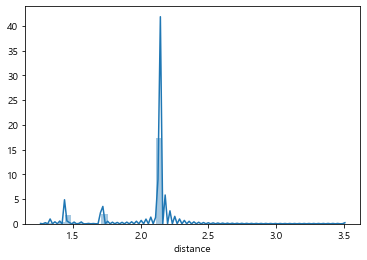

In [16]:
dst = df[df_ds_source['new_ds_source']=='West End_South Station']['distance']

sns.distplot(dst)

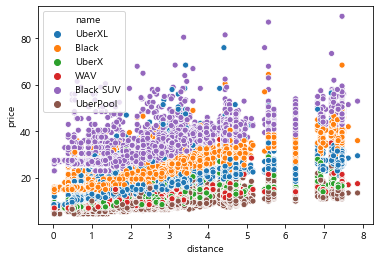

In [104]:
sns.scatterplot(x=df_ds_source.distance,
                y=df_ds_source.price,
                data=df_ds_source,
                hue=df_ds_source.name)

North End_West End
1.16    2203
1.11    1294
1.22     438
1.35     150
1.42     126
0.68      54
1.27      42
1.10      12
1.31      12
1.28       6
1.65       6
1.40       6
1.48       6
1.25       6
Name: distance, dtype: int64
unique value counts :  14


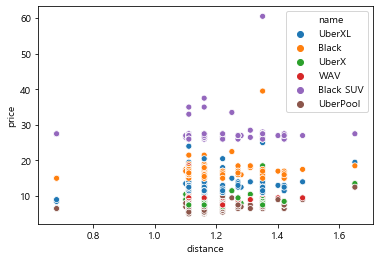

Beacon Hill_South Station
2.48    3705
1.35     228
1.40     192
1.47      84
1.34      60
1.39      46
0.60      36
1.49      30
1.68      18
1.79      18
2.70      12
1.51      12
1.48       6
1.50       6
2.20       6
1.52       6
1.41       6
1.72       6
2.50       6
Name: distance, dtype: int64
unique value counts :  19


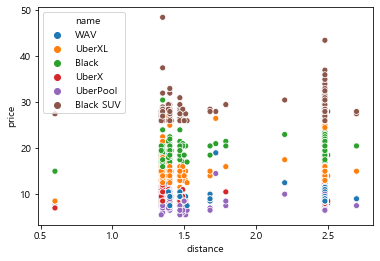

North Station_Fenway
3.05    4407
3.06     114
2.94     114
3.08      24
3.12       6
Name: distance, dtype: int64
unique value counts :  5


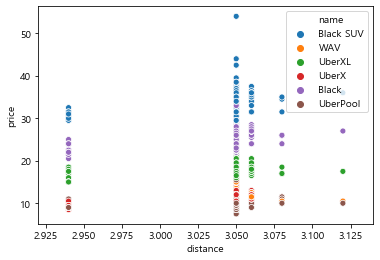

North End_Beacon Hill
1.46    1609
2.67     882
1.90     874
1.79     714
1.65     221
2.87     132
1.53      66
1.97      48
1.57      42
1.07      30
1.89      30
1.99      24
1.80      18
1.68      12
1.96      12
1.59      12
2.20       6
2.01       6
1.91       6
3.16       6
1.82       6
2.97       6
2.90       6
1.93       6
1.77       6
3.27       6
Name: distance, dtype: int64
unique value counts :  26


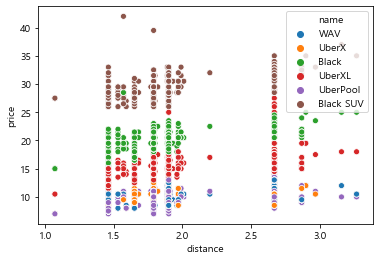

Boston University_North Station
3.39    3555
3.41     408
3.42     186
3.14     125
3.10      60
3.85      30
1.93      30
3.43      24
3.81      12
3.34      12
3.69       6
3.82       6
3.56       6
3.12       6
3.13       6
3.58       6
3.40       6
3.19       6
Name: distance, dtype: int64
unique value counts :  18


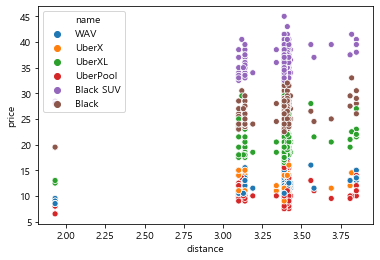

South Station_Back Bay
3.44    1586
3.53    1355
1.89    1019
2.22     126
2.49     108
2.23      72
2.53      42
3.46      36
3.58      24
2.27      18
3.54      18
2.32      12
3.50      12
2.55       6
3.28       6
2.31       6
2.64       6
2.65       6
2.15       6
2.75       1
Name: distance, dtype: int64
unique value counts :  20


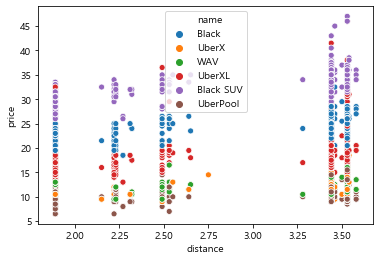

Fenway_North Station
3.07    3525
3.08     264
3.09     257
3.10     216
3.06     180
2.65      54
2.48      54
3.92      24
3.11      18
3.53      12
4.15       6
3.94       6
4.12       6
3.40       6
3.34       6
3.58       6
3.18       6
3.14       6
3.17       6
2.46       6
4.17       6
Name: distance, dtype: int64
unique value counts :  21


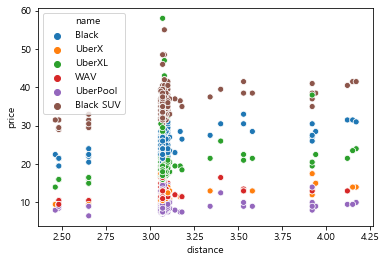

Theatre District_North End
1.57    4313
1.59      90
1.80      54
2.47      36
1.63      30
1.61      24
1.67      20
1.66       6
1.43       6
1.71       6
Name: distance, dtype: int64
unique value counts :  10


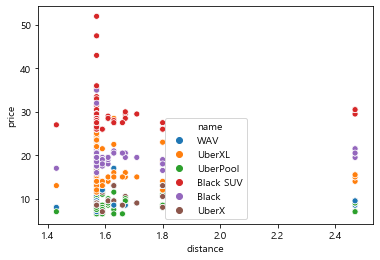

West End_Northeastern University
3.08    2153
3.15    1095
3.20     592
2.56     186
3.10     180
2.61     120
3.18      84
3.16      24
3.22      18
3.37      12
3.31      12
3.12      12
3.13      12
3.27       6
3.44       6
3.39       6
3.58       6
3.89       6
3.25       6
Name: distance, dtype: int64
unique value counts :  19


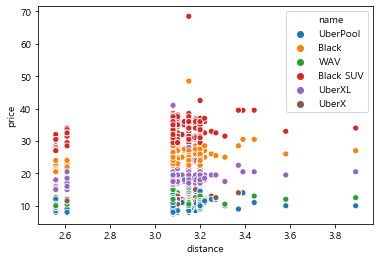

North End_Back Bay
2.34    981
3.61    968
2.84    778
2.73    683
2.33    424
2.62    294
2.58    197
2.36    108
2.63     78
2.38     60
1.37     54
2.66     30
2.74     29
2.93     24
2.37     14
2.69     12
2.79     12
2.39     12
2.78     12
3.26      6
2.85      6
2.95      6
3.22      6
3.81      6
3.16      6
3.67      6
2.32      6
2.45      6
Name: distance, dtype: int64
unique value counts :  28


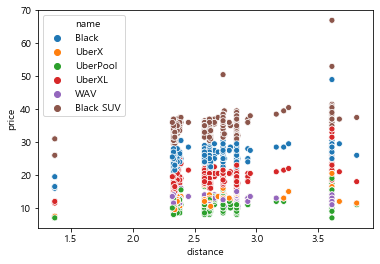

Back Bay_North End
2.33    1528
3.16     858
3.17     437
2.84     386
2.70     354
3.40     259
3.19     252
7.34     148
2.67     102
3.22      90
2.72      84
2.71      60
2.32      54
2.35      42
3.47      36
3.99      36
3.51      30
2.36      24
7.36      18
3.15      12
2.49       6
4.17       6
3.18       6
2.82       6
2.52       6
Name: distance, dtype: int64
unique value counts :  25


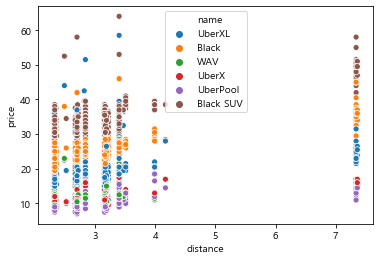

Fenway_Financial District
4.40    2490
4.42     690
3.64     204
4.43     132
4.44     132
4.41      90
3.63      78
7.19      72
3.98      60
3.65      48
4.39      36
3.07      36
4.33      30
3.16      30
4.78      30
3.19      24
7.24      24
3.38      18
7.18      18
4.50      18
7.50      18
1.94      18
3.59      18
3.39      18
3.99      18
3.66      12
4.51      12
4.05      12
3.00      12
3.06      12
3.71      12
3.97      12
2.99      12
2.08      12
3.34      12
2.90       9
4.12       6
4.79       6
7.62       6
4.71       6
3.42       6
3.46       6
3.72       6
4.52       6
4.86       6
4.28       6
3.10       6
3.23       6
3.81       6
3.69       6
3.40       6
3.26       6
5.47       5
Name: distance, dtype: int64
unique value counts :  53


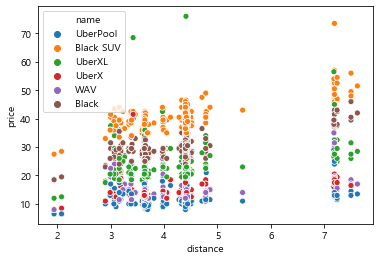

West End_Fenway
2.84    4603
2.90     137
3.13      42
2.87      24
2.83       6
Name: distance, dtype: int64
unique value counts :  5


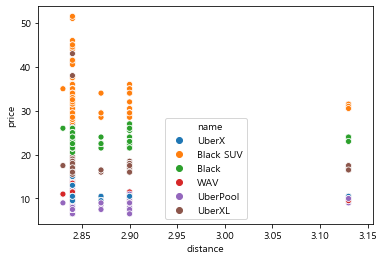

North End_Theatre District
1.41    4270
1.31      96
1.70      60
1.44      18
1.72      12
1.71      12
1.82      12
1.79      12
1.81      12
1.68       6
2.26       6
1.67       6
1.93       6
2.24       6
1.84       6
2.67       6
2.07       6
1.50       6
Name: distance, dtype: int64
unique value counts :  18


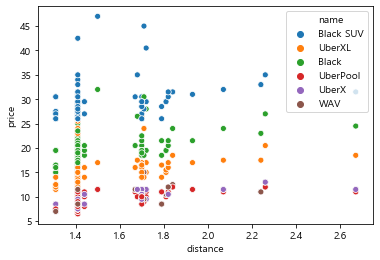

South Station_Theatre District
1.30    3674
1.28     354
1.12     192
1.69     108
1.37      90
1.56      48
1.72      36
0.02      30
1.78      24
2.01      24
2.13      18
2.10      12
1.39      12
2.32       6
1.18       6
1.89       6
1.91       6
2.21       6
Name: distance, dtype: int64
unique value counts :  18


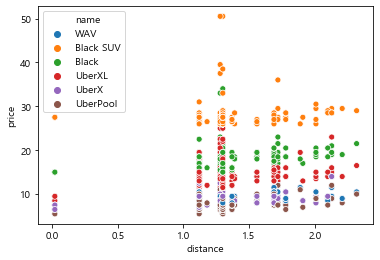

Northeastern University_Beacon Hill
2.61    3394
2.63     300
2.59     263
2.62     180
3.10     114
2.55      90
2.60      48
2.41      36
2.96      30
2.89      30
3.08      18
1.82      18
2.47      18
2.46      18
2.48      12
2.52      12
3.02       6
1.89       6
2.33       6
2.73       6
2.71       6
Name: distance, dtype: int64
unique value counts :  21


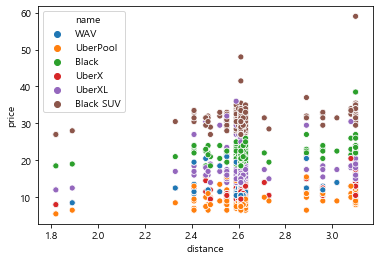

Theatre District_Fenway
2.66    3743
2.71     488
2.77      98
1.12      24
0.88      24
4.82      18
2.63      11
2.54       6
Name: distance, dtype: int64
unique value counts :  8


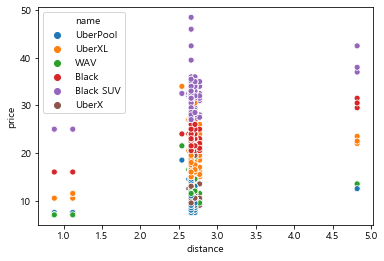

Northeastern University_North Station
3.22    3183
3.23     534
3.20     272
3.24     182
3.21     118
3.16      36
2.45      36
2.51      30
3.00      30
3.01      24
3.07      24
3.09      24
3.26      12
3.33      12
3.13      12
3.72      12
2.66      12
3.70       6
3.10       6
2.93       6
3.42       6
3.15       6
3.39       6
3.17       6
3.04       6
3.46       6
3.25       6
Name: distance, dtype: int64
unique value counts :  27


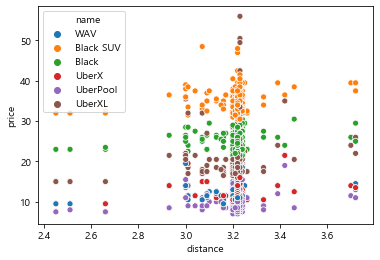

Northeastern University_Theatre District
1.91    1661
1.94    1084
2.81     669
1.89     665
1.24     102
2.19      84
2.20      79
2.05      48
2.53      36
1.95      24
1.97      24
2.78      18
1.02      18
2.17      18
2.04      12
2.51      12
1.92      12
2.01       6
2.06       6
1.99       6
1.98       6
Name: distance, dtype: int64
unique value counts :  21


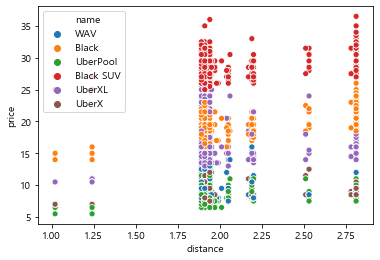

Back Bay_Boston University
1.41    1894
1.44    1041
1.39     651
1.40     411
1.51     270
0.03     102
1.43      60
1.45      54
1.49      18
1.42       6
Name: distance, dtype: int64
unique value counts :  10


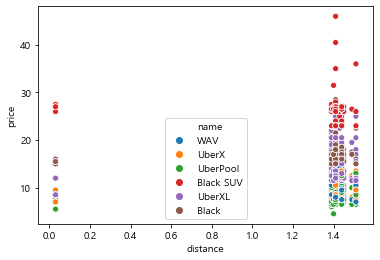

Haymarket Square_Back Bay
2.30    1708
2.04    1181
1.79     581
1.78     198
1.82     162
1.83     138
1.43     108
3.80      78
1.84      66
3.79      54
2.09      43
2.37      36
2.36      30
2.60      30
1.85      24
2.34      24
2.10      24
2.31      18
1.86      18
2.38      12
2.93      12
3.28       6
1.37       6
2.08       6
2.15       6
2.17       6
2.39       6
Name: distance, dtype: int64
unique value counts :  27


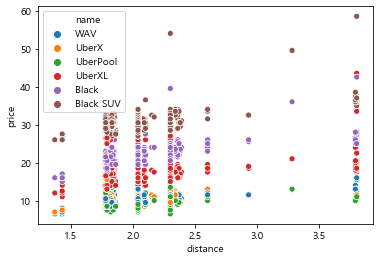

Beacon Hill_Northeastern University
1.97    2034
1.92    1075
2.56     600
1.96     216
2.63     108
2.54      95
1.93      84
1.95      48
2.57      48
1.90      42
2.62      42
2.68      36
1.94      36
2.22      24
1.60      18
1.98      18
2.85      12
2.73      12
2.66       6
2.20       6
2.59       6
1.59       6
2.60       6
2.83       6
1.91       6
2.61       6
2.15       6
Name: distance, dtype: int64
unique value counts :  27


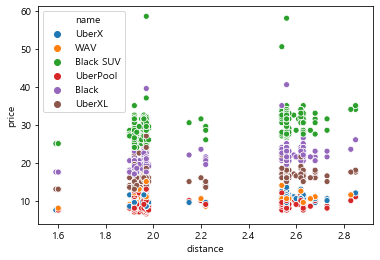

West End_South Station
2.14    3542
1.71     299
1.44     286
1.72     103
1.45      86
1.33      42
1.42      40
1.26      36
1.56      30
1.43      24
3.51      18
1.50      18
2.16       6
2.15       6
1.84       6
1.85       6
Name: distance, dtype: int64
unique value counts :  16


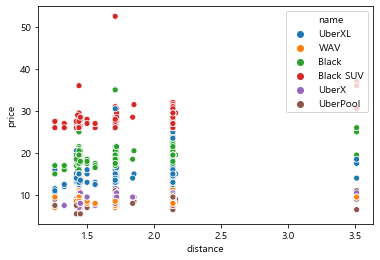

Haymarket Square_Beacon Hill
0.91    2764
1.36    1511
2.85      78
1.04      30
1.35      30
0.50      24
1.21      24
1.43      24
1.37      23
1.68       6
1.40       6
0.92       6
0.52       6
2.31       6
1.72       6
1.23       6
1.51       6
1.41       6
Name: distance, dtype: int64
unique value counts :  18


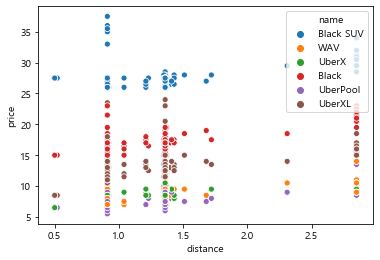

South Station_Beacon Hill
2.58    2164
2.50    2116
2.51      66
3.53      42
2.60      42
2.10      18
1.07      12
0.92      12
1.01      12
2.85       6
3.45       6
Name: distance, dtype: int64
unique value counts :  11


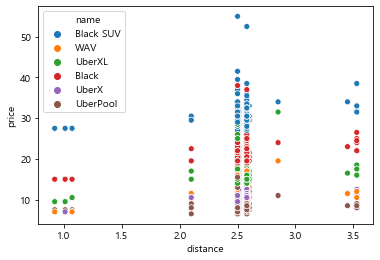

South Station_North Station
2.29    1198
2.38    1023
1.50     688
1.58     569
1.84     359
1.76     168
1.75     126
2.24      84
2.33      54
1.45      30
1.37      24
1.61      18
1.85      18
Name: distance, dtype: int64
unique value counts :  13


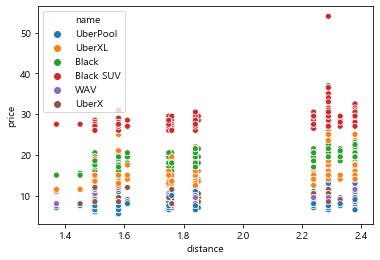

Haymarket Square_Financial District
0.99    2821
1.00     800
0.80     708
0.82     276
0.98     108
0.85      42
0.79      30
0.88      12
1.36       6
0.81       6
0.90       6
Name: distance, dtype: int64
unique value counts :  11


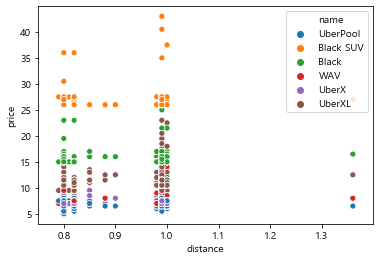

Back Bay_South Station
3.45    2187
6.26     987
1.68     815
1.89     240
1.71      66
6.27      54
2.00      35
2.44      24
0.30      18
1.79      18
1.94       6
2.06       6
1.87       6
3.46       6
1.76       6
Name: distance, dtype: int64
unique value counts :  15


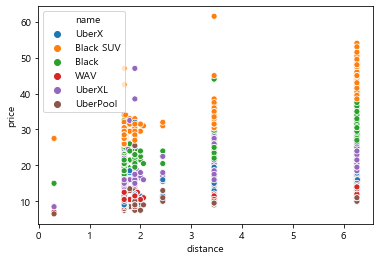

Beacon Hill_North End
2.19    1456
1.35    1396
1.87     359
2.43     294
1.51     280
2.21     198
1.46     150
1.49      84
2.25      78
1.52      72
1.69      60
1.75      42
1.39      42
2.50      42
1.45      42
1.38      36
1.50      30
1.17      24
1.53      24
1.48      24
1.55      12
3.01      12
1.54       6
2.41       6
1.72       6
2.18       6
2.20       6
Name: distance, dtype: int64
unique value counts :  27


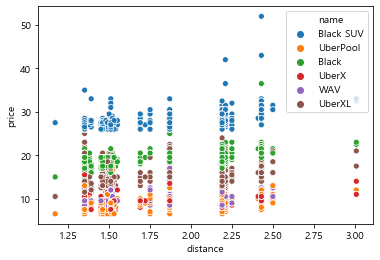

Haymarket Square_Theatre District
1.16    3393
1.18     639
1.14     339
2.01      72
1.45      30
1.20      12
1.23      12
1.42      11
1.19       6
1.83       6
1.44       6
1.21       6
1.47       6
1.51       6
Name: distance, dtype: int64
unique value counts :  14


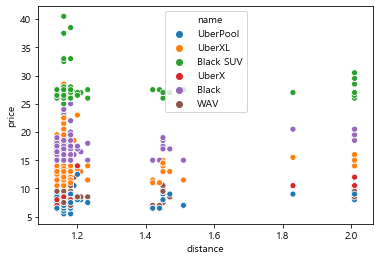

West End_Boston University
2.80    4460
2.86     204
1.55      36
1.72      12
3.28       6
2.78       6
2.83       6
2.92       6
Name: distance, dtype: int64
unique value counts :  8


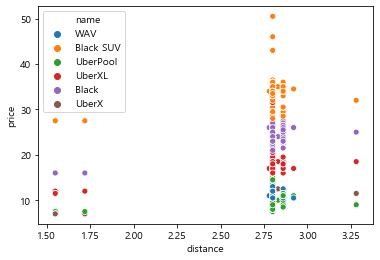

North End_North Station
1.03    2541
0.92    1753
1.09      54
0.30      36
1.14      30
1.12      24
1.06      12
1.11       6
1.04       6
Name: distance, dtype: int64
unique value counts :  9


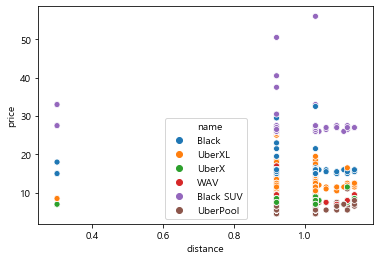

North End_Financial District
1.04    3057
1.07     618
1.22     334
1.13      92
1.10      78
1.34      72
1.23      42
1.64      30
1.20      30
1.14      12
1.09      12
1.32       6
1.26       6
1.21       6
1.63       6
1.19       6
1.84       6
1.36       6
1.66       6
1.25       6
Name: distance, dtype: int64
unique value counts :  20


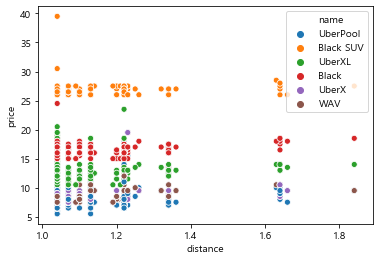

Back Bay_Northeastern University
1.22    2453
1.08    1029
1.10     876
1.26     144
1.45      24
1.41       6
1.37       6
Name: distance, dtype: int64
unique value counts :  7


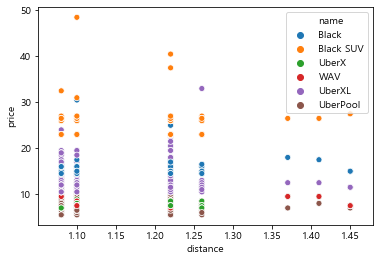

Financial District_Northeastern University
3.30    1530
7.46    1343
2.44     512
4.73     245
2.87     198
3.26     150
2.45     125
3.29      84
4.74      47
1.53      30
3.02      30
3.44      24
3.31      18
2.74      12
3.27      12
2.42      12
2.75      12
3.03      12
4.84      12
4.80      12
2.96       7
3.79       6
2.94       6
3.75       6
2.99       6
3.34       6
5.02       6
3.41       6
7.45       6
3.43       6
3.23       6
3.76       6
3.06       6
2.52       6
Name: distance, dtype: int64
unique value counts :  34


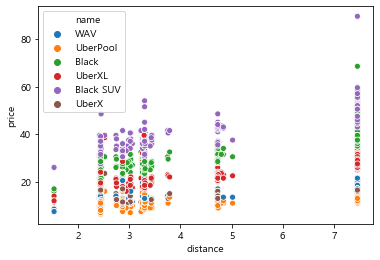

Financial District_North End
1.21    4112
1.23     120
0.92      84
1.24      48
1.04      24
1.22      24
1.29      12
1.14       6
1.06       6
Name: distance, dtype: int64
unique value counts :  9


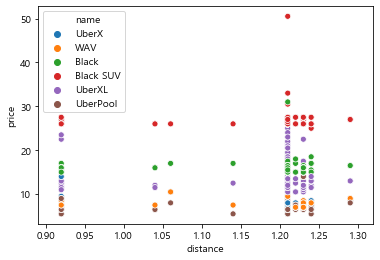

Boston University_Beacon Hill
2.79    3689
2.80     342
3.23     191
2.53      42
3.22      30
1.28      28
2.49      18
2.52      12
2.74       6
3.02       6
Name: distance, dtype: int64
unique value counts :  10


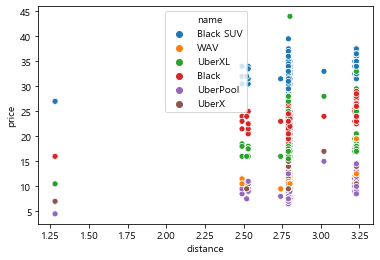

Theatre District_Haymarket Square
1.61    4310
1.65      72
1.71      48
1.38      24
1.67      24
1.72      24
1.75      18
1.70      12
1.68      12
1.34       6
1.84       6
1.62       6
1.79       6
1.73       6
Name: distance, dtype: int64
unique value counts :  14


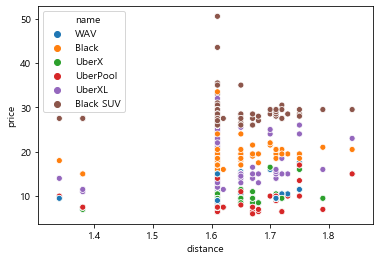

Theatre District_South Station
0.55    3884
0.62     318
0.58     291
0.59      57
0.02      30
0.67      18
1.68      12
0.68      12
0.90      12
0.60       6
0.73       6
0.76       6
Name: distance, dtype: int64
unique value counts :  12


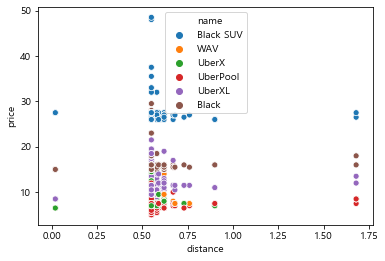

Haymarket Square_West End
0.61    1966
0.62    1644
0.68     647
0.92      58
0.04      42
0.91       6
0.93       6
0.72       6
Name: distance, dtype: int64
unique value counts :  8


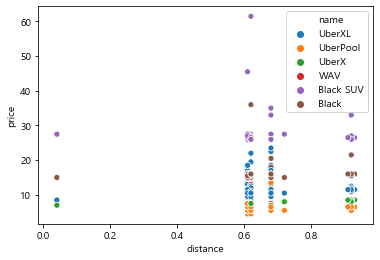

Haymarket Square_North Station
0.49    4368
0.79      42
0.53      36
0.52      36
0.81      24
0.38      24
0.40      18
0.58       6
Name: distance, dtype: int64
unique value counts :  8


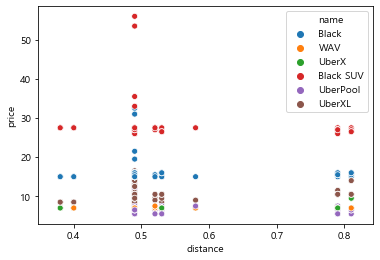

Financial District_South Station
0.39    4722
0.47      99
0.40      42
1.74       6
Name: distance, dtype: int64
unique value counts :  4


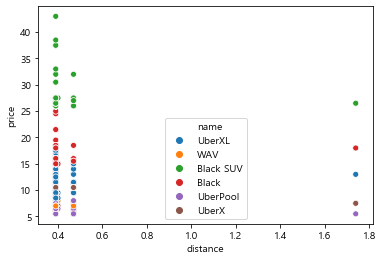

Fenway_Beacon Hill
2.46    3652
2.48     360
2.96     174
2.47     109
3.31      36
3.55      30
1.82      30
3.53      12
3.06       6
2.58       6
1.81       6
2.95       6
2.57       6
2.83       6
2.71       6
3.32       6
3.33       6
2.73       6
Name: distance, dtype: int64
unique value counts :  18


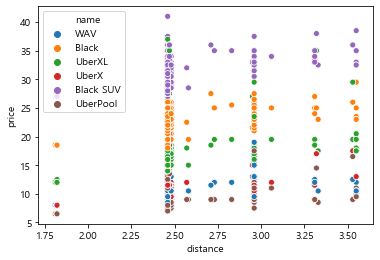

Boston University_Back Bay
1.56    3960
1.51     415
0.03     102
2.56      12
1.83       6
1.52       6
Name: distance, dtype: int64
unique value counts :  6


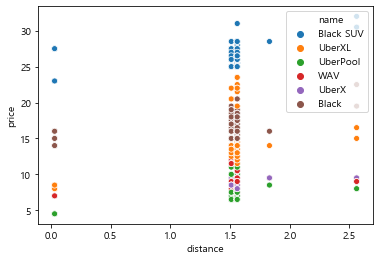

North Station_Northeastern University
3.30    2342
3.37     929
3.42     486
3.31     292
2.78     222
2.82      99
3.39      84
3.15      78
3.33      27
3.59      24
2.84       6
3.40       6
3.35       6
3.66       6
Name: distance, dtype: int64
unique value counts :  14


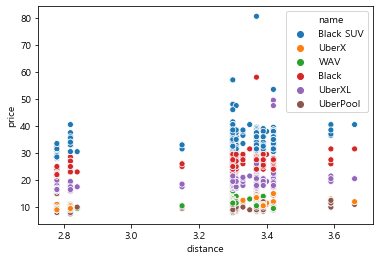

Back Bay_Fenway
1.34    4423
1.43      30
1.10      18
1.39      12
1.33       6
1.42       6
1.48       6
Name: distance, dtype: int64
unique value counts :  7


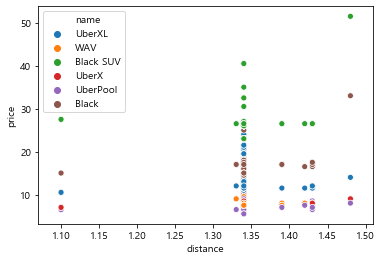

Northeastern University_Financial District
4.55    2365
4.57     665
2.67     168
6.91     138
6.97     126
3.79     114
4.53      94
4.58      90
2.68      66
4.56      48
3.35      42
2.57      42
3.76      36
4.93      30
4.48      30
4.54      29
1.28      29
4.12      24
4.39      18
3.15      18
4.13      18
3.74      18
3.21      18
3.31      18
7.04      18
2.72      18
2.83      18
3.95      12
2.59      12
3.80      12
4.10      12
3.16      12
4.49      12
2.66      12
2.69      12
4.41      12
4.59       6
2.60       6
2.63       6
2.61       6
3.20       6
2.77       6
2.51       6
3.24       6
4.42       6
2.65       6
4.43       6
3.58       6
3.17       6
2.88       6
3.97       6
2.74       6
3.69       6
4.60       6
4.86       6
7.86       6
2.94       6
3.51       6
3.00       6
Name: distance, dtype: int64
unique value counts :  59


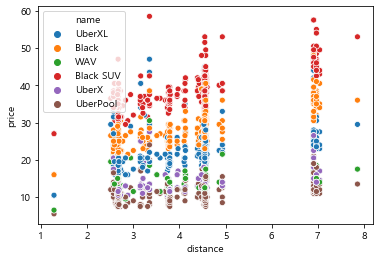

South Station_Financial District
0.54    2309
0.63    2118
0.65     294
0.78      96
0.70      30
1.60      12
0.71      12
0.66       6
0.55       6
Name: distance, dtype: int64
unique value counts :  9


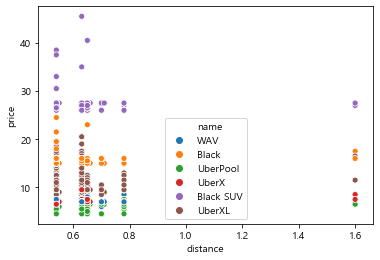

Boston University_West End
3.04    3879
3.05     378
3.53     138
3.47     126
2.78      72
1.76      48
3.72      18
3.46      18
2.74      12
3.32      12
3.52      12
2.99      12
3.21       6
3.73       6
3.26       6
2.77       6
Name: distance, dtype: int64
unique value counts :  16


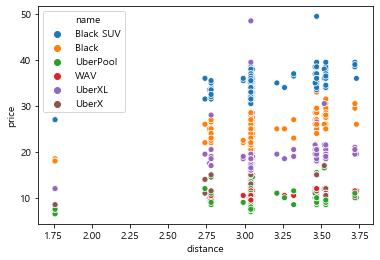

North Station_North End
1.08    2960
0.90     704
0.94     390
1.19     114
1.88     102
2.12      96
0.29      36
1.84      12
1.90      12
1.02      12
2.07       6
1.01       6
1.00       6
Name: distance, dtype: int64
unique value counts :  13


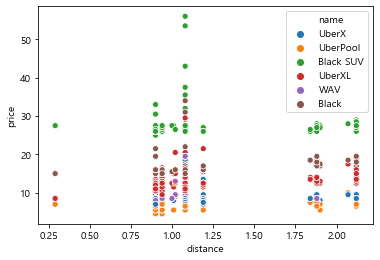

North Station_Haymarket Square
0.56    4190
0.67     144
1.99      72
0.70      48
0.78      41
0.35      24
0.29      18
0.81       6
0.79       6
0.76       6
Name: distance, dtype: int64
unique value counts :  10


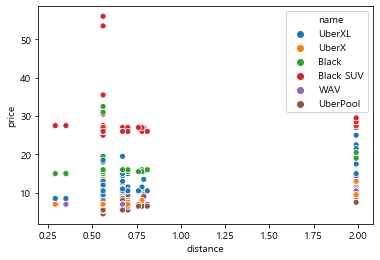

Northeastern University_Back Bay
1.64    3491
1.34     312
1.62     260
1.40     150
1.43     126
1.52      42
1.49      36
1.65      30
1.47      24
1.59      12
0.91      12
0.97      12
1.39       6
1.67       6
1.56       6
1.54       6
Name: distance, dtype: int64
unique value counts :  16


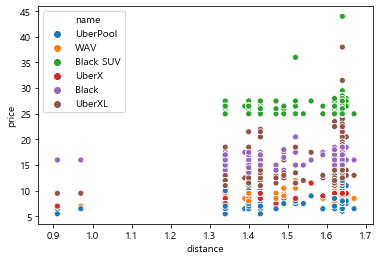

West End_North End
1.23    1332
0.98    1130
1.00     591
1.06     358
1.86     324
1.03     138
1.25     132
1.01     108
0.12      54
1.88      53
2.09      48
1.04      24
1.05      24
1.91      12
1.54      12
1.02       6
Name: distance, dtype: int64
unique value counts :  16


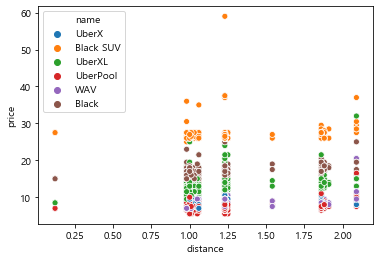

Fenway_Theatre District
2.66    3112
2.38     698
2.21     116
2.65     116
2.22      60
2.70      60
2.48      41
2.39      36
1.12      30
2.30      18
2.50      18
2.32      18
1.39      15
2.37      12
2.29      12
3.57      12
2.49       6
2.23       6
2.63       6
2.33       6
2.64       6
Name: distance, dtype: int64
unique value counts :  21


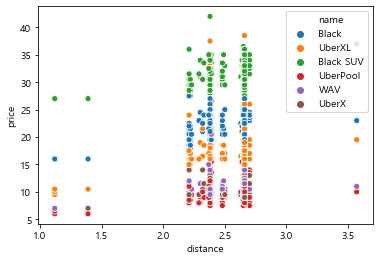

Financial District_Boston University
5.56    2096
4.44    1475
5.70     894
0.56      47
4.46      24
5.69      18
3.42      18
4.43      12
5.66      12
4.50       6
Name: distance, dtype: int64
unique value counts :  10


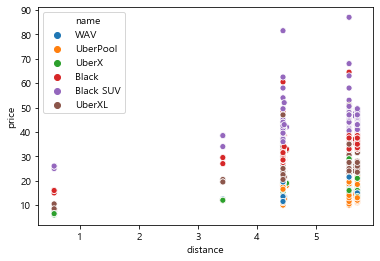

Beacon Hill_Haymarket Square
1.35    3103
1.23     931
1.39     143
1.36     102
1.33      54
2.23      42
2.36      36
1.49      30
1.40      30
1.18      18
1.38      12
1.57      12
1.37      12
1.41      12
1.32      12
1.45      12
1.25       6
Name: distance, dtype: int64
unique value counts :  17


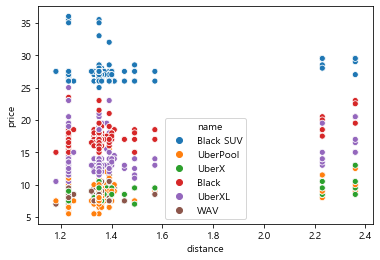

Theatre District_Boston University
2.62    4034
2.67     527
2.73      87
0.27      30
5.46      17
2.49      12
4.98      12
2.68       6
2.83       3
Name: distance, dtype: int64
unique value counts :  9


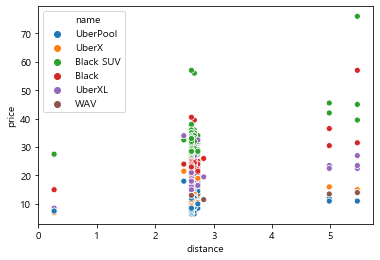

Back Bay_Haymarket Square
2.32    2946
2.20    1015
3.79     204
2.35     114
2.74      66
3.21      48
3.34      48
2.46      42
2.23      30
7.38      24
2.33       6
2.37       6
2.49       6
2.54       6
2.34       6
3.82       6
3.32       6
3.55       6
Name: distance, dtype: int64
unique value counts :  18


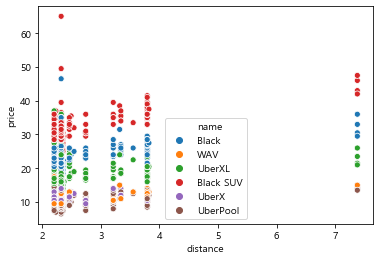

Fenway_Back Bay
1.50    3978
1.49     192
1.82     161
1.60     108
1.57      12
1.08      12
1.76      12
1.75      12
1.34       6
1.61       6
Name: distance, dtype: int64
unique value counts :  10


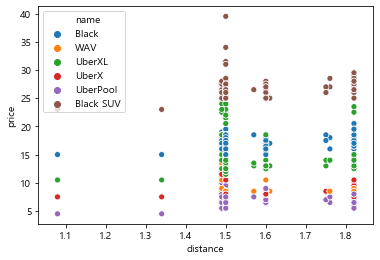

Beacon Hill_Boston University
2.27    3654
2.33     312
2.25     240
2.38      78
2.28      36
0.70      29
2.32      18
2.30      12
2.15       6
Name: distance, dtype: int64
unique value counts :  9


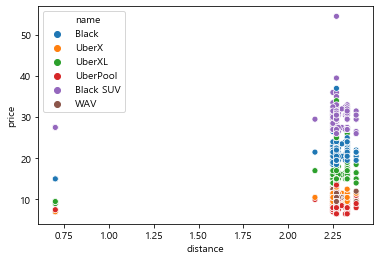

Theatre District_Northeastern University
1.80    3064
1.81     942
2.32     152
1.22     114
2.31      66
2.15      60
2.90      42
1.95      30
2.91      30
2.27      30
2.06      12
2.11      12
2.22      12
2.92      12
1.12       6
2.59       6
2.07       6
3.02       6
Name: distance, dtype: int64
unique value counts :  18


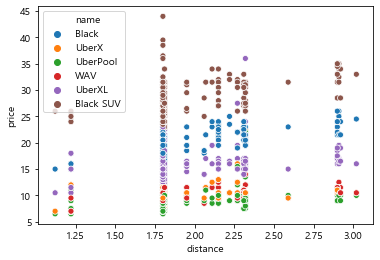

Fenway_West End
2.72    4029
2.73     294
2.71     172
3.26      84
3.20      48
3.79      36
3.40      24
2.08      24
2.03      18
3.85      18
3.25      18
3.56      12
2.79      12
2.96       6
3.29       6
3.19       6
3.39       6
Name: distance, dtype: int64
unique value counts :  17


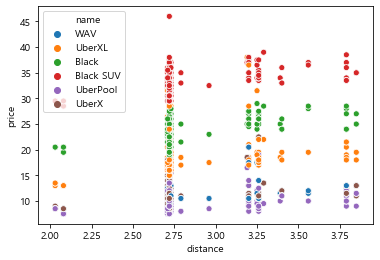

Financial District_Haymarket Square
1.25    4074
0.92     546
1.02      60
1.10      42
1.09      36
1.26      36
1.34       6
1.30       6
1.31       6
Name: distance, dtype: int64
unique value counts :  9


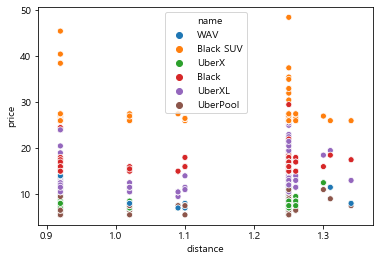

North Station_South Station
2.17    2900
2.12     671
1.34     408
1.61     248
1.92      48
1.69      42
2.13       6
3.47       6
1.62       6
1.30       6
Name: distance, dtype: int64
unique value counts :  10


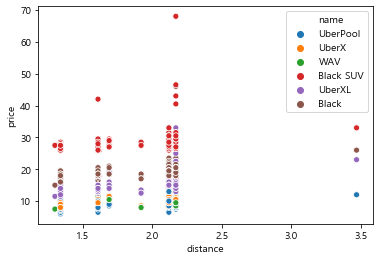

Northeastern University_West End
2.86    3285
2.88     288
2.87     216
2.84     202
3.34      78
3.40      72
2.73      48
2.85      48
3.13      36
2.66      36
2.71      24
2.80      24
3.54      24
2.77      18
3.19      12
3.32      12
3.55      12
2.21      12
2.72      12
3.06      12
3.56      12
3.17       6
2.58       6
3.38       6
3.52       6
3.53       6
3.26       6
2.94       6
2.96       6
3.25       6
Name: distance, dtype: int64
unique value counts :  30


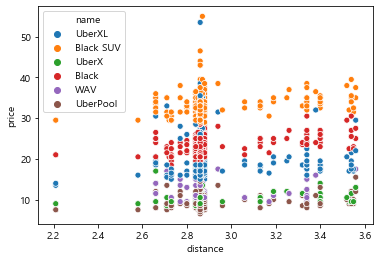

Financial District_Fenway
4.48    4249
4.50     114
6.83      66
3.46      42
1.48      18
4.52      18
4.94      12
4.07      12
3.38      12
1.25      12
3.81       6
4.47       6
4.49       6
4.91       6
Name: distance, dtype: int64
unique value counts :  14


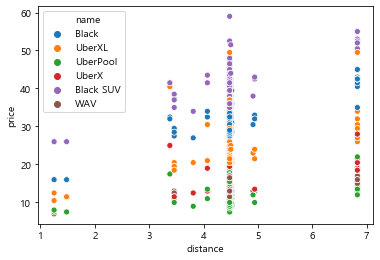

West End_Haymarket Square
0.72    3675
0.73     353
0.94     102
0.86      78
0.88      66
0.04      41
1.02      24
0.85      18
2.03       6
0.89       6
1.90       6
0.71       6
Name: distance, dtype: int64
unique value counts :  12


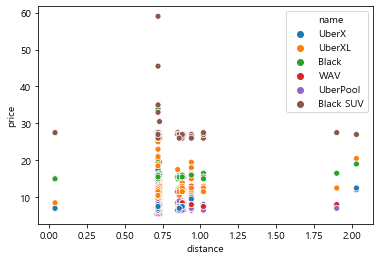

Boston University_Theatre District
2.98    3683
2.45     741
2.40     149
2.44      42
0.17      30
2.99      24
3.89      12
2.56      12
2.93      12
2.51      12
2.41       6
3.79       6
2.52       6
Name: distance, dtype: int64
unique value counts :  13


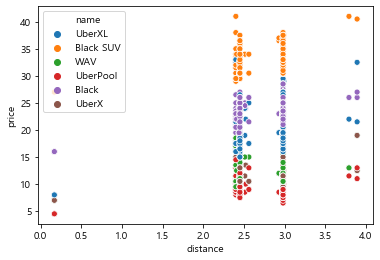

North Station_Boston University
3.01    4330
3.02      90
2.36      24
3.04      24
3.05      12
3.41       6
Name: distance, dtype: int64
unique value counts :  6


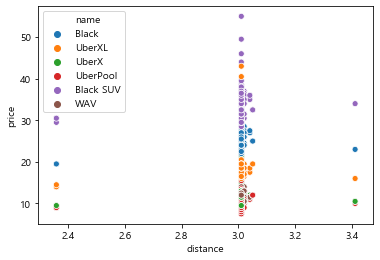

South Station_West End
2.82    585
1.71    575
1.70    557
1.63    538
2.74    492
1.97    383
1.89    306
1.62    174
1.78     90
1.26     84
2.88     84
1.88     84
2.80     83
1.85     66
1.96     60
2.03     48
2.04     42
1.77     36
2.11     36
1.95     30
1.74     30
1.72     30
2.61     24
1.18     24
1.76     18
1.75     18
1.69     18
2.16     11
2.02      6
1.79      6
2.22      6
2.63      6
2.07      6
1.98      6
1.73      6
2.70      6
Name: distance, dtype: int64
unique value counts :  36


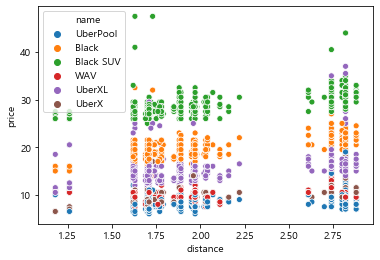

Boston University_Financial District
4.72    2643
4.74     695
3.96     250
4.76     197
4.30      78
7.25      72
3.98      66
1.17      48
3.91      47
3.22      42
7.20      36
3.71      30
3.18      28
4.31      24
5.10      24
4.44      24
3.66      18
3.13      18
3.78      18
4.65      18
4.49      12
4.12      12
5.16      12
3.46      12
4.48      12
4.04      12
4.00      12
3.99      12
4.35      12
3.74       6
4.38       6
3.25       6
3.76       6
3.70       6
4.47       6
4.90       6
4.80       6
3.09       6
3.08       6
4.96       6
4.70       6
4.62       6
4.03       6
3.45       6
4.43       6
4.40       6
4.94       6
5.12       6
3.47       6
Name: distance, dtype: int64
unique value counts :  49


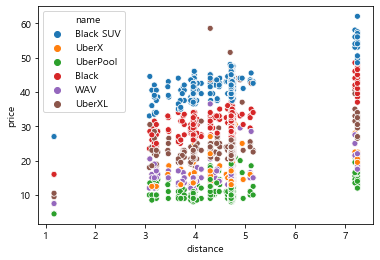

Beacon Hill_Fenway
2.32    3535
2.37     402
2.29     193
2.31     114
2.42     102
2.36      42
1.31      36
2.40      18
2.35      18
2.43       6
Name: distance, dtype: int64
unique value counts :  10


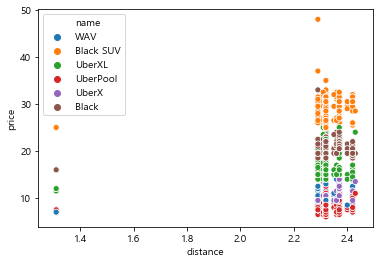

In [105]:
for i in df_ds_source.new_ds_source.unique():
    
    print(i)
    
    #df[df_ds_source['new_ds_source']=='West End_South Station']['distance'].value_counts()
    
    temp_df = df[df_ds_source['new_ds_source']== i]
    
    print(temp_df['distance'].value_counts())
    
    print("unique value counts : ", len(temp_df['distance'].unique()))
    
    sns.scatterplot(x=temp_df.distance,
                y=temp_df.price,
                data=temp_df,
                hue=temp_df.name)
    
    plt.show()

In [17]:
df_ds_source['distance_rup'] = round(df_ds_source['distance'],1)

In [18]:
df_ds_source['distance_rup']

0         1.1
1         1.1
2         1.1
3         1.1
4         1.1
         ... 
329135    1.0
329136    1.0
329137    1.0
329138    1.0
329139    1.0
Name: distance_rup, Length: 329140, dtype: float64

In [19]:
df_ds_source.head()

distance  price       name        date  hour   temp  clouds  pressure  \
0      1.11   12.0     UberXL  2018-11-30    22  38.65    0.96   1017.23   
1      1.11   16.0      Black  2018-12-13    10  20.12    0.43   1031.07   
2      1.11    7.5      UberX  2018-12-13    19  32.75    0.51   1033.75   
3      1.11    7.5        WAV  2018-12-16    23  42.36    1.00   1012.15   
4      1.11   26.0  Black SUV  2018-12-14     0  30.07    0.69   1034.97   

     rain  humidity   wind       new_ds_source  distance_rup  
0  0.0000      0.65   3.13  North End_West End           1.1  
1  0.0000      0.64   3.88  North End_West End           1.1  
2  0.0000      0.57   1.90  North End_West End           1.1  
3  0.2088      0.77  11.46  North End_West End           1.1  
4  0.0000      0.68   1.98  North End_West End           1.1

In [20]:
temp_df.head()

NameError: name 'temp_df' is not defined

North End_West End
1.2    2647
1.1    1306
1.4     282
1.3      60
0.7      54
1.6       6
1.5       6
Name: distance_rup, dtype: int64
unique value counts :  7


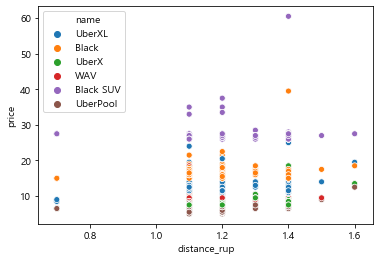

Beacon Hill_South Station
2.5    3711
1.4     472
1.5     144
1.3      60
0.6      36
1.7      24
1.8      18
2.7      12
2.2       6
Name: distance_rup, dtype: int64
unique value counts :  9


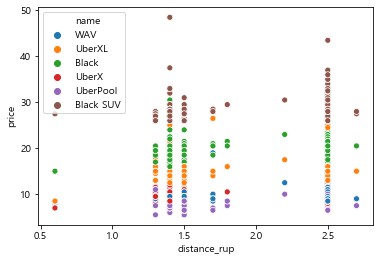

North Station_Fenway
3.0    4407
3.1     144
2.9     114
Name: distance_rup, dtype: int64
unique value counts :  3


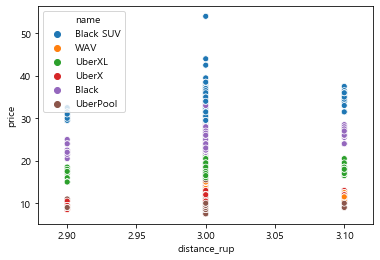

North End_Beacon Hill
1.5    1675
1.9     916
2.7     882
1.8     744
1.6     275
2.9     138
2.0      90
1.1      30
1.7      12
3.2       6
2.2       6
3.3       6
3.0       6
Name: distance_rup, dtype: int64
unique value counts :  13


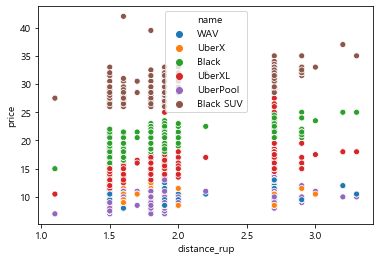

Boston University_North Station
3.4    4179
3.1     197
3.8      48
1.9      30
3.3      12
3.6      12
3.7       6
3.2       6
Name: distance_rup, dtype: int64
unique value counts :  8


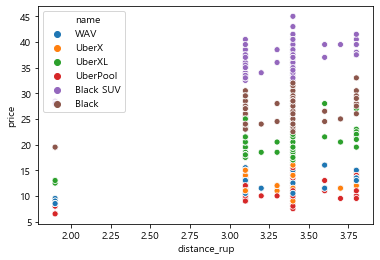

South Station_Back Bay
3.4    1586
3.5    1421
1.9    1019
2.2     204
2.5     150
2.3      36
3.6      24
2.6      18
3.3       6
2.8       1
Name: distance_rup, dtype: int64
unique value counts :  10


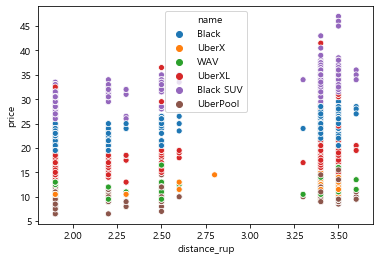

Fenway_North Station
3.1    4466
2.5      60
2.6      54
3.9      30
4.2      12
3.2      12
3.5      12
3.3       6
3.6       6
3.4       6
4.1       6
Name: distance_rup, dtype: int64
unique value counts :  11


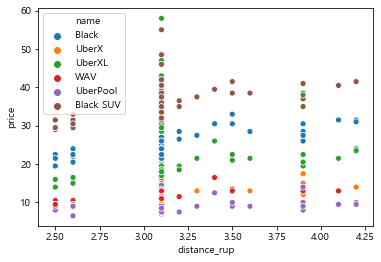

Theatre District_North End
1.6    4457
1.8      54
2.5      36
1.7      32
1.4       6
Name: distance_rup, dtype: int64
unique value counts :  5


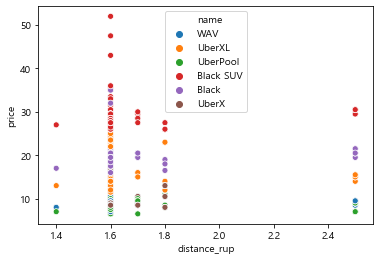

West End_Northeastern University
3.1    2357
3.2    1819
2.6     306
3.4      24
3.3      18
3.6       6
3.9       6
Name: distance_rup, dtype: int64
unique value counts :  7


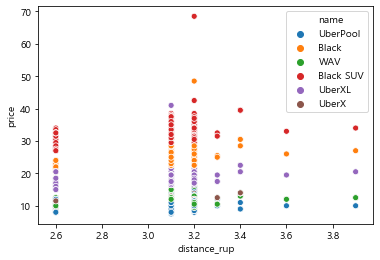

North End_Back Bay
2.3    1411
3.6     968
2.8     808
2.7     754
2.6     569
2.4     200
1.4      54
2.9      24
3.2      12
3.8       6
3.7       6
3.3       6
3.0       6
Name: distance_rup, dtype: int64
unique value counts :  13


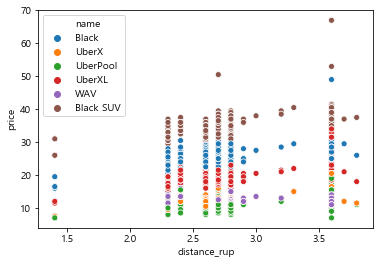

Back Bay_North End
3.2    1655
2.3    1582
2.7     600
2.8     392
3.4     259
7.3     148
2.4      66
3.5      66
4.0      36
7.4      18
2.5      12
4.2       6
Name: distance_rup, dtype: int64
unique value counts :  12


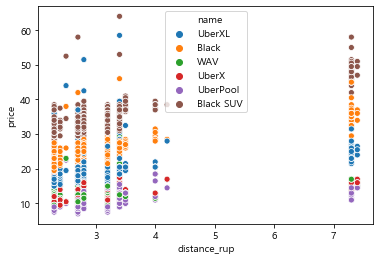

Fenway_Financial District
4.4    3570
3.6     348
7.2     114
4.0     102
3.2      60
3.1      54
3.4      48
4.3      36
4.5      36
4.8      36
3.7      36
3.0      24
7.5      18
3.3      18
1.9      18
2.1      12
2.9       9
4.7       6
3.8       6
4.1       6
3.5       6
4.9       6
7.6       6
5.5       5
Name: distance_rup, dtype: int64
unique value counts :  24


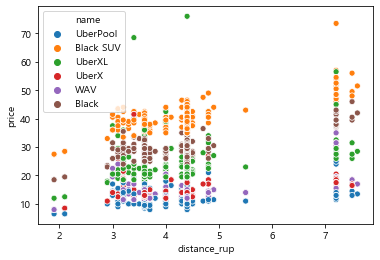

West End_Fenway
2.8    4609
2.9     161
3.1      42
Name: distance_rup, dtype: int64
unique value counts :  3


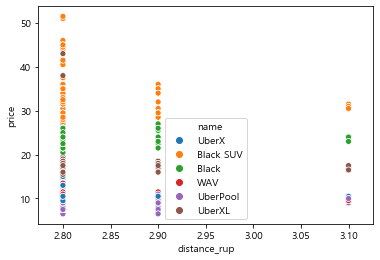

North End_Theatre District
1.4    4288
1.3      96
1.7      96
1.8      42
2.7       6
1.9       6
2.1       6
2.3       6
2.2       6
1.5       6
Name: distance_rup, dtype: int64
unique value counts :  10


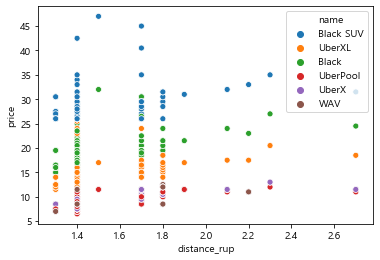

South Station_Theatre District
1.3    4028
1.1     192
1.7     144
1.4     102
1.6      48
2.1      30
0.0      30
1.8      24
2.0      24
1.9      12
2.2       6
2.3       6
1.2       6
Name: distance_rup, dtype: int64
unique value counts :  13


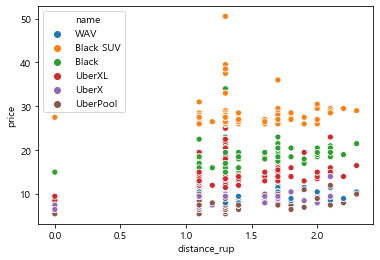

Northeastern University_Beacon Hill
2.6    4275
3.1     132
2.5      60
2.4      36
3.0      36
2.9      30
1.8      18
2.7      12
2.3       6
1.9       6
Name: distance_rup, dtype: int64
unique value counts :  10


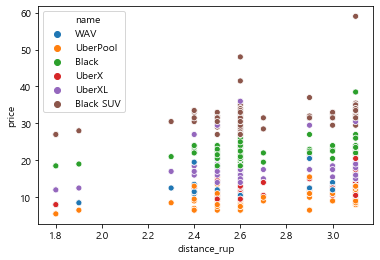

Theatre District_Fenway
2.7    4231
2.8      98
1.1      24
0.9      24
4.8      18
2.6      11
2.5       6
Name: distance_rup, dtype: int64
unique value counts :  7


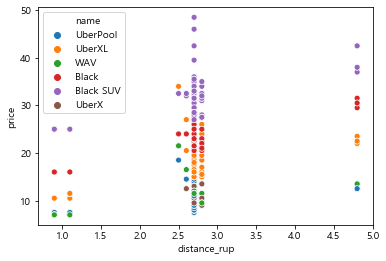

Northeastern University_North Station
3.2    4343
3.1      66
3.0      60
2.4      36
2.5      30
3.3      24
3.7      18
2.7      12
3.4      12
2.9       6
3.5       6
Name: distance_rup, dtype: int64
unique value counts :  11


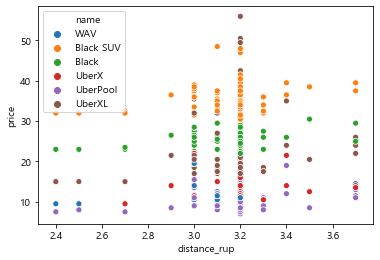

Northeastern University_Theatre District
1.9    3422
2.8     687
2.2     181
2.0     126
1.2     102
2.5      48
1.0      18
2.1       6
Name: distance_rup, dtype: int64
unique value counts :  8


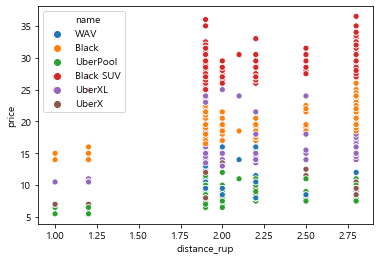

Back Bay_Boston University
1.4    4117
1.5     288
0.0     102
Name: distance_rup, dtype: int64
unique value counts :  3


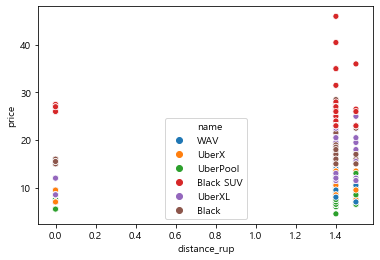

Haymarket Square_Back Bay
2.3    1750
2.0    1181
1.8    1169
3.8     132
1.4     114
2.4      84
2.1      73
2.6      30
1.9      18
2.9      12
2.2      12
3.3       6
Name: distance_rup, dtype: int64
unique value counts :  12


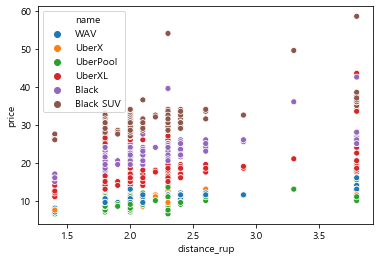

Beacon Hill_Northeastern University
2.0    2316
1.9    1243
2.6     816
2.5      95
2.7      54
2.2      36
1.6      24
2.8      18
Name: distance_rup, dtype: int64
unique value counts :  8


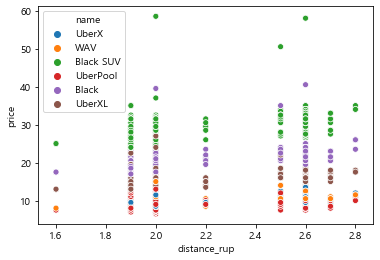

West End_South Station
2.1    3542
1.4     436
1.7     402
1.3      78
1.6      30
3.5      18
1.5      18
1.8      12
2.2      12
Name: distance_rup, dtype: int64
unique value counts :  9


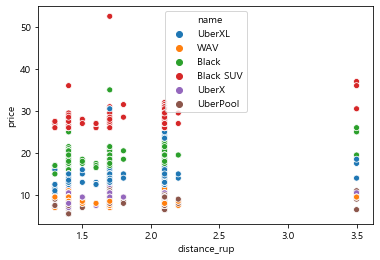

Haymarket Square_Beacon Hill
0.9    2770
1.4    1600
2.8      78
1.2      30
1.0      30
0.5      30
1.7      12
2.3       6
1.5       6
Name: distance_rup, dtype: int64
unique value counts :  9


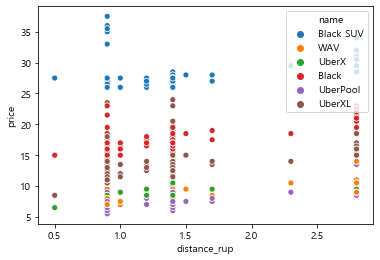

South Station_Beacon Hill
2.6    2206
2.5    2182
3.5      42
2.1      18
0.9      12
1.1      12
1.0      12
3.4       6
2.8       6
Name: distance_rup, dtype: int64
unique value counts :  9


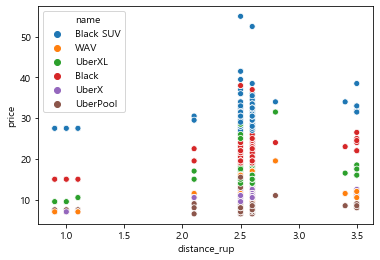

South Station_North Station
2.3    1252
2.4    1023
1.5     688
1.8     671
1.6     587
2.2      84
1.4      54
Name: distance_rup, dtype: int64
unique value counts :  7


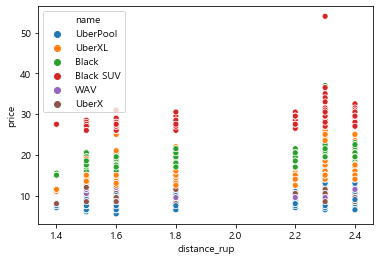

Haymarket Square_Financial District
1.0    3729
0.8    1062
0.9      18
1.4       6
Name: distance_rup, dtype: int64
unique value counts :  4


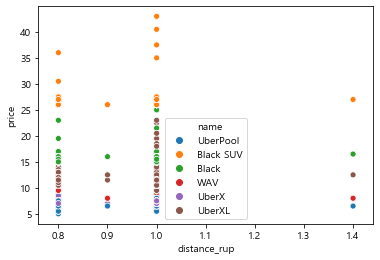

Back Bay_South Station
3.4    2187
6.3    1041
1.7     881
1.9     252
2.0      35
2.4      24
1.8      24
0.3      18
2.1       6
3.5       6
Name: distance_rup, dtype: int64
unique value counts :  10


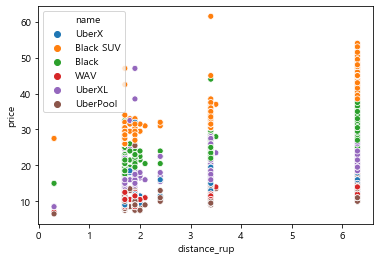

Beacon Hill_North End
2.2    1744
1.4    1516
1.5     670
1.9     359
2.4     300
1.7      66
1.8      42
2.5      42
1.2      24
1.6      12
3.0      12
Name: distance_rup, dtype: int64
unique value counts :  11


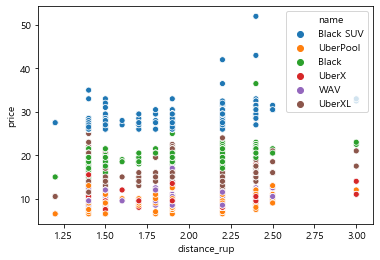

Haymarket Square_Theatre District
1.2    4068
1.1     339
2.0      72
1.4      47
1.5      12
1.8       6
Name: distance_rup, dtype: int64
unique value counts :  6


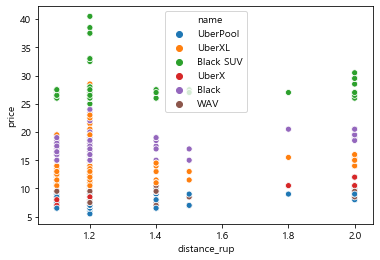

West End_Boston University
2.8    4472
2.9     210
1.6      36
1.7      12
3.3       6
Name: distance_rup, dtype: int64
unique value counts :  5


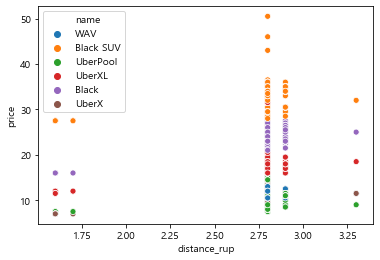

North End_North Station
1.0    2547
0.9    1753
1.1     126
0.3      36
Name: distance_rup, dtype: int64
unique value counts :  4


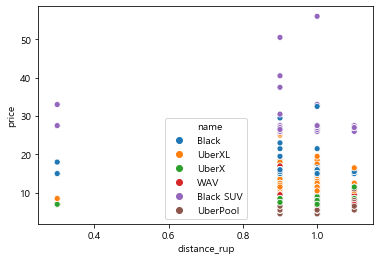

North End_Financial District
1.0    3057
1.1     812
1.2     424
1.3      84
1.6      36
1.8       6
1.7       6
1.4       6
Name: distance_rup, dtype: int64
unique value counts :  8


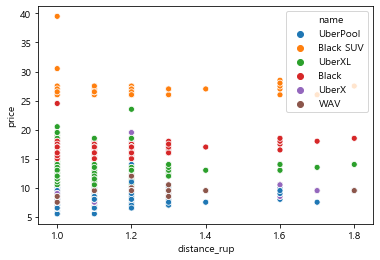

Back Bay_Northeastern University
1.2    2453
1.1    1905
1.3     144
1.4      36
Name: distance_rup, dtype: int64
unique value counts :  4


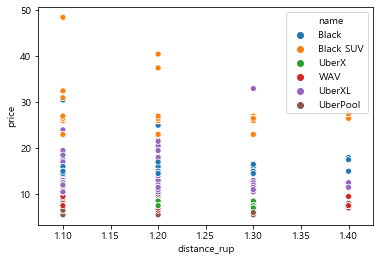

Financial District_Northeastern University
3.3    1800
7.5    1343
2.4     649
4.7     292
2.9     204
3.0      55
3.4      36
1.5      30
4.8      24
3.8      18
2.8      12
2.7      12
3.1       6
3.2       6
7.4       6
2.5       6
5.0       6
Name: distance_rup, dtype: int64
unique value counts :  17


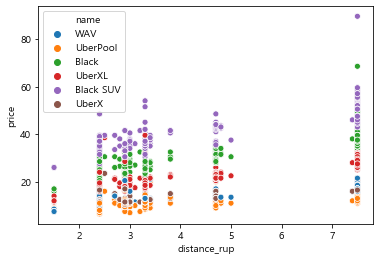

Financial District_North End
1.2    4304
0.9      84
1.0      24
1.1      12
1.3      12
Name: distance_rup, dtype: int64
unique value counts :  5


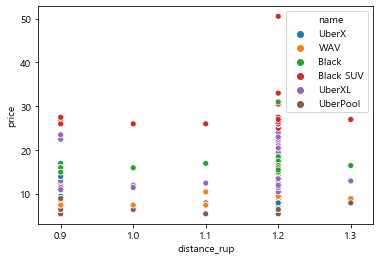

Boston University_Beacon Hill
2.8    4031
3.2     221
2.5      72
1.3      28
2.7       6
3.0       6
Name: distance_rup, dtype: int64
unique value counts :  6


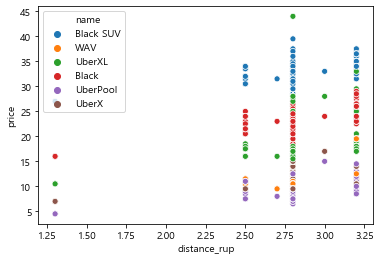

Theatre District_Haymarket Square
1.6    4388
1.7     126
1.8      30
1.4      24
1.3       6
Name: distance_rup, dtype: int64
unique value counts :  5


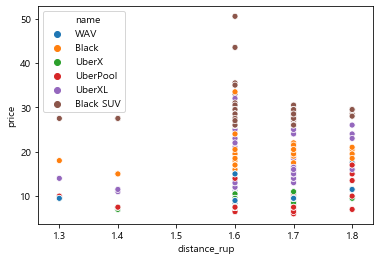

Theatre District_South Station
0.6    4556
0.7      36
0.0      30
1.7      12
0.9      12
0.8       6
Name: distance_rup, dtype: int64
unique value counts :  6


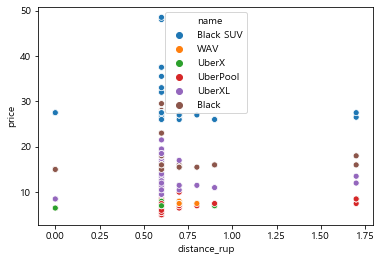

Haymarket Square_West End
0.6    3610
0.7     653
0.9      70
0.0      42
Name: distance_rup, dtype: int64
unique value counts :  4


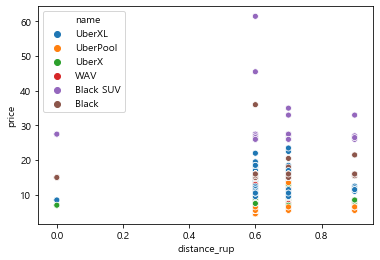

Haymarket Square_North Station
0.5    4440
0.8      66
0.4      42
0.6       6
Name: distance_rup, dtype: int64
unique value counts :  4


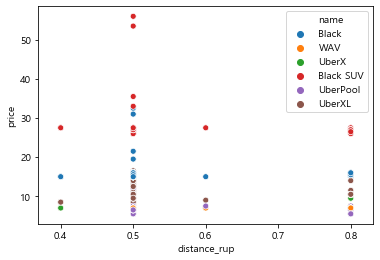

Financial District_South Station
0.4    4764
0.5      99
1.7       6
Name: distance_rup, dtype: int64
unique value counts :  3


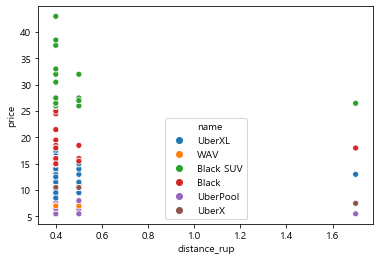

Fenway_Beacon Hill
2.5    4121
3.0     180
3.3      48
1.8      36
3.6      30
2.6      12
2.7      12
3.5      12
2.8       6
3.1       6
Name: distance_rup, dtype: int64
unique value counts :  10


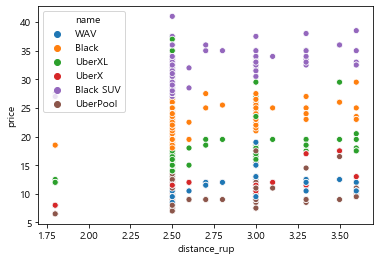

Boston University_Back Bay
1.6    3960
1.5     421
0.0     102
2.6      12
1.8       6
Name: distance_rup, dtype: int64
unique value counts :  5


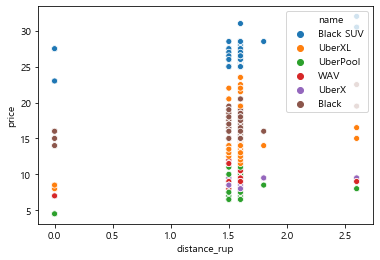

North Station_Northeastern University
3.3    2661
3.4    1511
2.8     327
3.2      78
3.6      24
3.7       6
Name: distance_rup, dtype: int64
unique value counts :  6


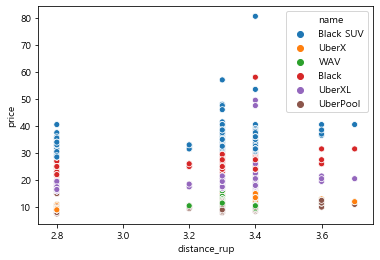

Back Bay_Fenway
1.3    4429
1.4      48
1.1      18
1.5       6
Name: distance_rup, dtype: int64
unique value counts :  4


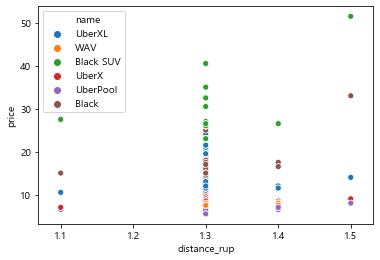

Northeastern University_Financial District
4.6    3180
2.7     282
4.5     165
3.8     162
7.0     144
6.9     138
2.6      78
3.2      66
4.1      54
3.4      42
4.4      42
4.9      36
1.3      29
2.8      24
3.7      24
3.3      18
4.0      18
2.9      12
7.9       6
3.5       6
2.5       6
3.0       6
3.6       6
Name: distance_rup, dtype: int64
unique value counts :  23


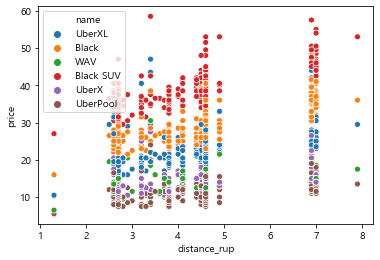

South Station_Financial District
0.6    2418
0.5    2309
0.8      96
0.7      48
1.6      12
Name: distance_rup, dtype: int64
unique value counts :  5


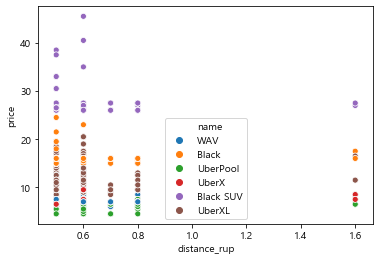

Boston University_West End
3.0    4269
3.5     294
2.8      78
1.8      48
3.7      24
3.3      18
2.7      12
3.2       6
Name: distance_rup, dtype: int64
unique value counts :  8


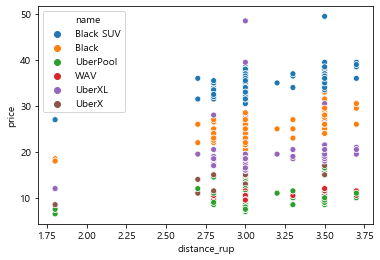

North Station_North End
1.1    2960
0.9    1094
1.2     114
1.9     114
2.1     102
0.3      36
1.0      24
1.8      12
Name: distance_rup, dtype: int64
unique value counts :  8


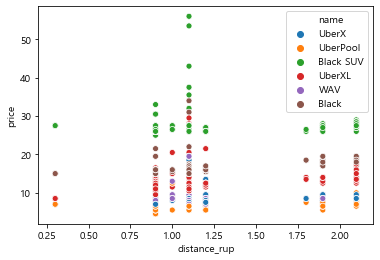

North Station_Haymarket Square
0.6    4190
0.7     192
2.0      72
0.8      59
0.4      24
0.3      18
Name: distance_rup, dtype: int64
unique value counts :  6


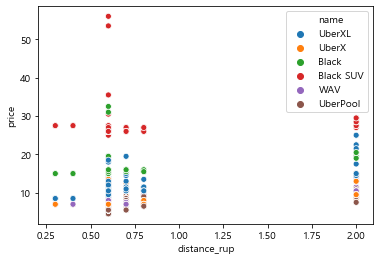

Northeastern University_Back Bay
1.6    3799
1.3     312
1.4     282
1.5     108
0.9      12
1.0      12
1.7       6
Name: distance_rup, dtype: int64
unique value counts :  7


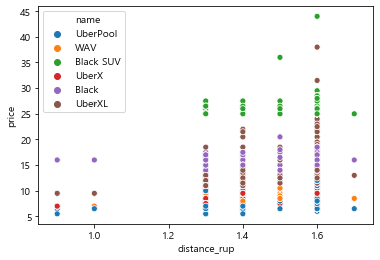

West End_North End
1.0    2021
1.2    1464
1.9     389
1.1     358
0.1      54
2.1      48
1.5      12
Name: distance_rup, dtype: int64
unique value counts :  7


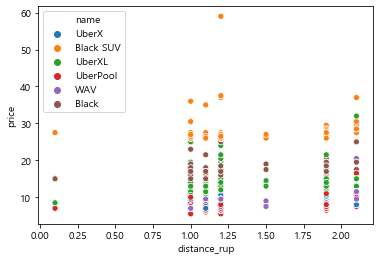

Fenway_Theatre District
2.7    3172
2.4     746
2.2     182
2.6     128
2.5      65
2.3      54
1.1      30
1.4      15
3.6      12
Name: distance_rup, dtype: int64
unique value counts :  9


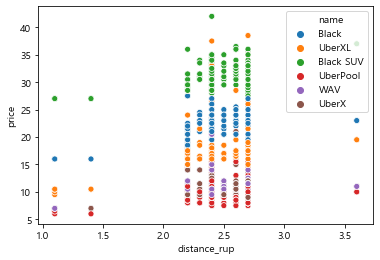

Financial District_Boston University
5.6    2096
4.4    1487
5.7     924
0.6      47
4.5      30
3.4      18
Name: distance_rup, dtype: int64
unique value counts :  6


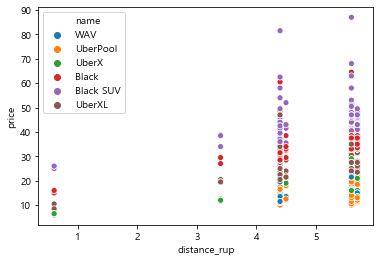

Beacon Hill_Haymarket Square
1.4    3426
1.2     955
1.3      66
2.2      42
2.4      36
1.5      30
1.6      12
Name: distance_rup, dtype: int64
unique value counts :  7


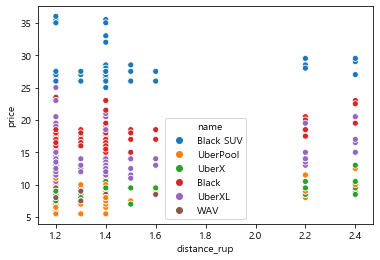

Theatre District_Boston University
2.6    4034
2.7     620
0.3      30
5.5      17
2.5      12
5.0      12
2.8       3
Name: distance_rup, dtype: int64
unique value counts :  7


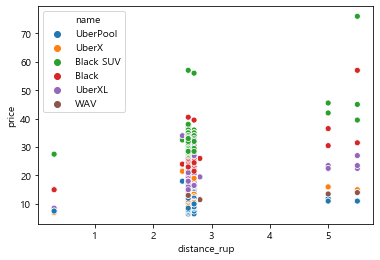

Back Bay_Haymarket Square
2.3    2958
2.2    1045
3.8     210
2.4     120
2.7      66
3.3      54
2.5      54
3.2      48
7.4      24
3.6       6
Name: distance_rup, dtype: int64
unique value counts :  10


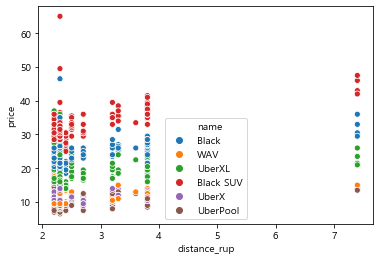

Fenway_Back Bay
1.5    4170
1.8     185
1.6     126
1.1      12
1.3       6
Name: distance_rup, dtype: int64
unique value counts :  5


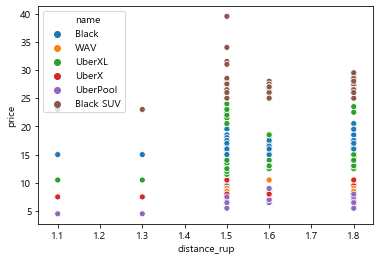

Beacon Hill_Boston University
2.3    4032
2.2     246
2.4      78
0.7      29
Name: distance_rup, dtype: int64
unique value counts :  4


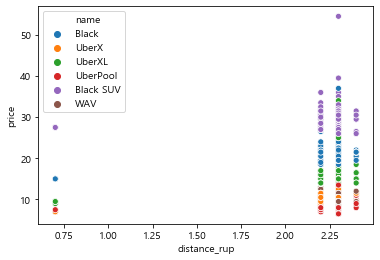

Theatre District_Northeastern University
1.8    4006
2.3     248
1.2     114
2.9      84
2.2      72
2.1      30
2.0      30
1.1       6
2.6       6
3.0       6
Name: distance_rup, dtype: int64
unique value counts :  10


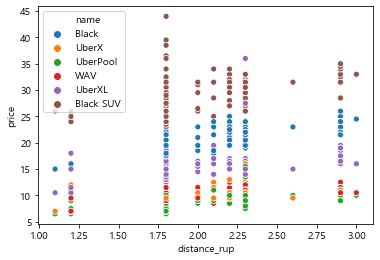

Fenway_West End
2.7    4495
3.3      90
3.2      72
3.8      54
3.4      30
2.1      24
2.0      18
2.8      12
3.6      12
3.0       6
Name: distance_rup, dtype: int64
unique value counts :  10


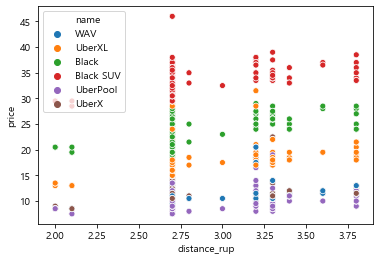

Financial District_Haymarket Square
1.2    4074
0.9     546
1.1      78
1.0      60
1.3      54
Name: distance_rup, dtype: int64
unique value counts :  5


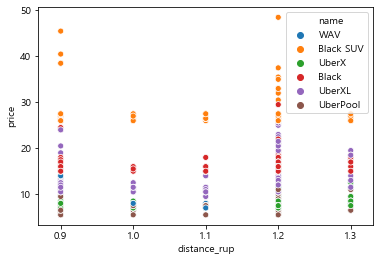

North Station_South Station
2.2    2900
2.1     677
1.3     414
1.6     254
1.9      48
1.7      42
3.5       6
Name: distance_rup, dtype: int64
unique value counts :  7


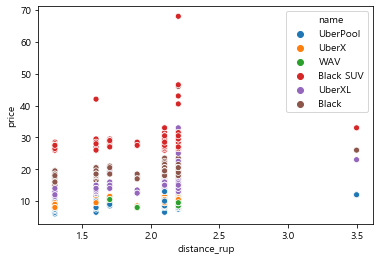

Northeastern University_West End
2.9    3795
2.8     292
2.7     120
3.3      96
3.4      78
3.1      48
3.5      36
3.2      24
3.6      24
2.2      12
2.6       6
3.0       6
Name: distance_rup, dtype: int64
unique value counts :  12


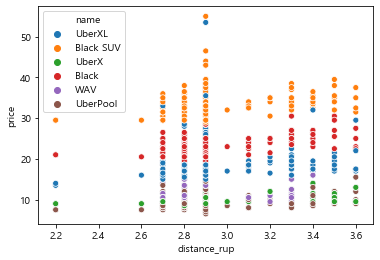

Financial District_Fenway
4.5    4393
6.8      66
3.5      42
4.9      18
1.5      18
1.2      12
3.4      12
4.1      12
3.8       6
Name: distance_rup, dtype: int64
unique value counts :  9


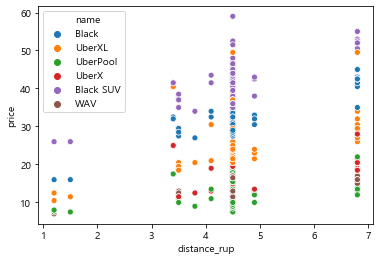

West End_Haymarket Square
0.7    4034
0.9     252
0.0      41
1.0      24
0.8      18
1.9       6
2.0       6
Name: distance_rup, dtype: int64
unique value counts :  7


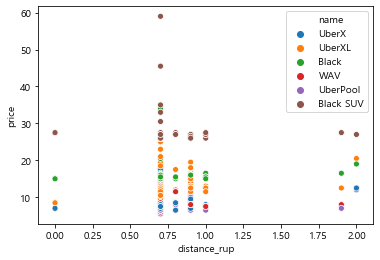

Boston University_Theatre District
3.0    3707
2.4     938
0.2      30
2.5      18
2.9      12
3.9      12
2.6      12
3.8       6
Name: distance_rup, dtype: int64
unique value counts :  8


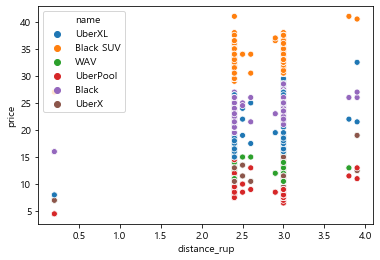

North Station_Boston University
3.0    4456
2.4      24
3.4       6
Name: distance_rup, dtype: int64
unique value counts :  3


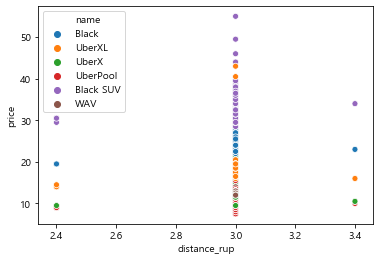

South Station_West End
1.7    1216
1.6     712
2.8     668
2.0     575
2.7     498
1.9     390
1.8     234
1.3      84
2.9      84
2.1      42
2.6      30
1.2      24
2.2      17
Name: distance_rup, dtype: int64
unique value counts :  13


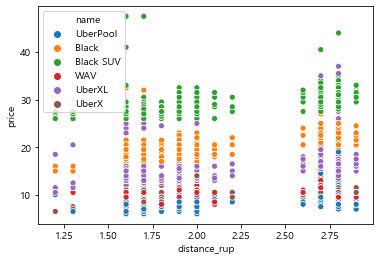

Boston University_Financial District
4.7    3344
4.0     358
4.8     203
7.2     108
4.3     102
3.2      76
3.7      60
4.4      54
1.2      48
3.9      47
5.1      30
3.1      30
4.5      30
4.6      24
3.8      24
3.5      18
4.1      12
4.9      12
5.2      12
3.4       6
5.0       6
Name: distance_rup, dtype: int64
unique value counts :  21


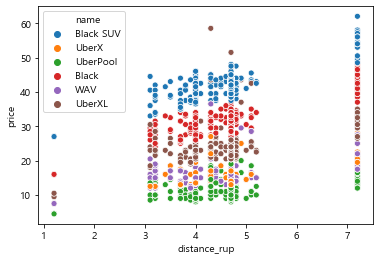

Beacon Hill_Fenway
2.3    3842
2.4     588
1.3      36
Name: distance_rup, dtype: int64
unique value counts :  3


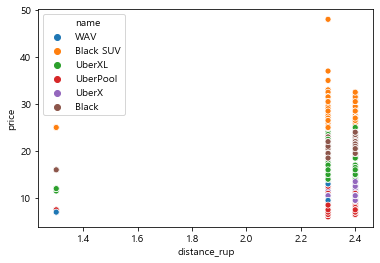

In [21]:
for i in df_ds_source.new_ds_source.unique():
    
    print(i)
    
    #df[df_ds_source['new_ds_source']=='West End_South Station']['distance'].value_counts()
    
    temp_df = df_ds_source[df_ds_source['new_ds_source']== i]
    
    print(temp_df['distance_rup'].value_counts())
    
    print("unique value counts : ", len(temp_df['distance_rup'].unique()))
    
    sns.scatterplot(x=temp_df.distance_rup,
                y=temp_df.price,
                data=temp_df,
                hue=temp_df.name)
    
    plt.show()

In [22]:
df_ds_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329140 entries, 0 to 329139
Data columns (total 13 columns):
distance         329140 non-null float64
price            329140 non-null float64
name             329140 non-null object
date             329140 non-null object
hour             329140 non-null int64
temp             329140 non-null float64
clouds           329140 non-null float64
pressure         329140 non-null float64
rain             329140 non-null float64
humidity         329140 non-null float64
wind             329140 non-null float64
new_ds_source    329140 non-null object
distance_rup     329140 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 32.6+ MB


In [23]:
df_ds_source['date'] = pd.to_datetime(df_ds_source['date'])

In [24]:
df_ds_source['week'] =[pd.to_datetime(df_ds_source.date[i]).weekday() for i in range(len(df_ds_source.date))]

In [25]:
df_ds_source.head(3)

distance  price    name       date  hour   temp  clouds  pressure  rain  \
0      1.11   12.0  UberXL 2018-11-30    22  38.65    0.96   1017.23   0.0   
1      1.11   16.0   Black 2018-12-13    10  20.12    0.43   1031.07   0.0   
2      1.11    7.5   UberX 2018-12-13    19  32.75    0.51   1033.75   0.0   

   humidity  wind       new_ds_source  distance_rup  week  
0      0.65  3.13  North End_West End           1.1     4  
1      0.64  3.88  North End_West End           1.1     3  
2      0.57  1.90  North End_West End           1.1     3

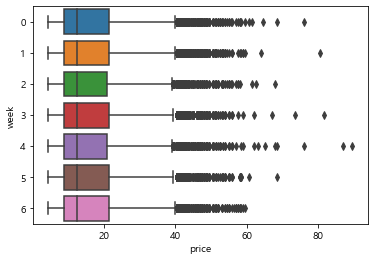

In [26]:
sns.boxplot(df_ds_source['price'], y=df_ds_source['week'],orient = 'h')

In [27]:
df_ds_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329140 entries, 0 to 329139
Data columns (total 14 columns):
distance         329140 non-null float64
price            329140 non-null float64
name             329140 non-null object
date             329140 non-null datetime64[ns]
hour             329140 non-null int64
temp             329140 non-null float64
clouds           329140 non-null float64
pressure         329140 non-null float64
rain             329140 non-null float64
humidity         329140 non-null float64
wind             329140 non-null float64
new_ds_source    329140 non-null object
distance_rup     329140 non-null float64
week             329140 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 35.2+ MB


In [28]:
df_ds_source.columns

Index(['distance', 'price', 'name', 'date', 'hour', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind', 'new_ds_source', 'distance_rup',
       'week'],
      dtype='object')

In [29]:
df_ds_source.drop(['date','distance'], axis = 1, inplace = True)

In [30]:
df_ds_source_la = df_ds_source.copy()

In [31]:
lb = LabelEncoder()

df_ds_source_la['name'] = lb.fit_transform(df_ds_source_la['name'])
df_ds_source_la['new_ds_source'] = lb.fit_transform(df_ds_source_la['new_ds_source'])

In [32]:
x = df_ds_source_la[['name', 'hour', 'temp', 'clouds',
                 'pressure', 'rain', 'humidity', 'wind',
                 'new_ds_source', 'distance_rup','week']]
y = df_ds_source_la['price'].copy()

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329140 entries, 0 to 329139
Data columns (total 11 columns):
name             329140 non-null int32
hour             329140 non-null int64
temp             329140 non-null float64
clouds           329140 non-null float64
pressure         329140 non-null float64
rain             329140 non-null float64
humidity         329140 non-null float64
wind             329140 non-null float64
new_ds_source    329140 non-null int32
distance_rup     329140 non-null float64
week             329140 non-null int64
dtypes: float64(7), int32(2), int64(2)
memory usage: 25.1 MB


In [46]:
import statsmodels.api as sm

In [47]:
x_constant = sm.add_constant(x)
uber_model = sm.OLS(y, x).fit()
uber_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          1.957e+05
Date:                Fri, 14 Feb 2020   Prob (F-statistic):                        0.00
Time:                        20:13:45   Log-Likelihood:                     -1.0852e+06
No. Observations:              329140   AIC:                                  2.170e+06
Df Residuals:                  329129   BIC:                                  2.171e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
name             -2.7586      0.007   -413.190      0.000      -2.772      -2.745
hour              0.0010      0.002      0.536      0.592      -0.003       0.005
temp              0.0112      0.002      5.411      0.000       0.007       0.015
clouds           -0.0354      0.047     -0.755      0.450      -0.127       0.056
pressure          0.0163      0.000    153.049      0.000       0.016       0.017
rain             -1.4403      0.387     -3.718      0.000      -2.200      -0.681
humidity          0.3122      0.123      2.530      0.011       0.070       0.554
wind              0.0320      0.004      8.586      0.000       0.025       0.039
new_ds_source     0.0027      0.001      4.931      0.000       0.002       0.004
distance_rup      2.4456      0.010    251.040      0.000       2.427       2.465
week             -0.0459      0.006     -7.376      0.000      -0.058      -0.034
==============================================================================
Omnibus:                    11044.432   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12201.202
Skew:                           0.472   Prob(JB):                         0.00
Kurtosis:                       3.005   Cond. No.                     3.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
counter=0
while (len(cols)>0):
    p= []
    counter+=1

    X_1 = df_ds_source_la[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
#     print(counter)
#     print(len(pd.Series(model.pvalues.values)))
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
#         print('inside')
        cols.remove(feature_with_p_max)
    else:
        break
    print(feature_with_p_max)
#     print(len(cols))
selected_features_BE = cols
print(selected_features_BE)

wind
hour
week
temp
rain
humidity
clouds
pressure
['name', 'new_ds_source', 'distance_rup']


In [50]:
len(selected_features_BE)

3

In [51]:
x_back = x[selected_features_BE].copy()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_back, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [54]:
# Backward Elimination을 통해 피처를 선택후 선형회귀 

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

train_pred = lin_reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)


predicted = lin_reg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

lin_reg_back_1 = {}
lin_reg_back_1['Train'] = round(train_rmse,4)
lin_reg_back_1['Test'] = round(test_rmse, 4)

Train score :  6.538001257411111
Test score :  6.545639711175902


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [35]:
seed = 0

max_depth : 2
Train score    : 4.1434   Test score    : 4.137
max_depth : 3
Train score    : 3.2773   Test score    : 3.268
max_depth : 4
Train score    : 2.3726   Test score    : 2.3723
max_depth : 5
Train score    : 2.0839   Test score    : 2.0883
max_depth : 6
Train score    : 1.9886   Test score    : 1.9985
max_depth : 7
Train score    : 1.9499   Test score    : 1.9622
max_depth : 8
Train score    : 1.9197   Test score    : 1.9417
max_depth : 9
Train score    : 1.8905   Test score    : 1.9357
max_depth : 10
Train score    : 1.8583   Test score    : 1.9396
max_depth : 11
Train score    : 1.8191   Test score    : 1.9739
max_depth : 12
Train score    : 1.7736   Test score    : 2.0262
max_depth : 13
Train score    : 1.7269   Test score    : 2.0652
max_depth : 14
Train score    : 1.6758   Test score    : 2.1044
max_depth : 15
Train score    : 1.6192   Test score    : 2.1461


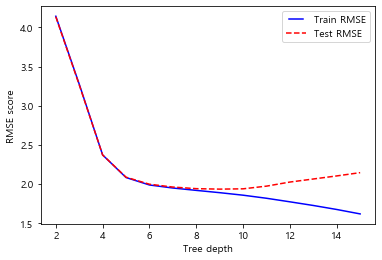

Wall time: 13.1 s


In [142]:
%%time
# 결정트리 파라미터 튜닝

train_results = []
test_results = []

max_depth = range(2,16)

for i in max_depth:
        
    print("max_depth : {}".format(i))

    dtree = DecisionTreeRegressor(criterion = "mse", 
                                  max_depth=i,
                                 random_state=seed)

    dtree.fit(X_train, y_train)    
    

    train_pred = dtree.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    predicted = dtree.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
    
    print("Train score    : {}   Test score    : {}".format(round(train_rmse,4), round(test_rmse,4)))
            
    train_results.append(train_rmse)
    test_results.append(test_rmse)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depth, test_results, 'r--', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Tree depth')
plt.show()    


In [143]:
# 랜덤포레스트 파라미터 튜닝

n_estimators = [50, 100]
max_features = ['sqrt', 'log2']
max_depth = range(3,16)

In [144]:
%%time

for i in n_estimators:
    
    print("n_estimatror : ", i)
    
    for j in max_depth:

        print("max_depth : ", j)

        rfc=RandomForestRegressor(random_state=0, n_estimators= i, max_depth=j)

        rfc.fit(X_train, y_train)

        train_pred = rfc.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', train_rmse)

        predicted = rfc.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)

n_estimatror :  50
max_depth :  3
Train score :  3.074923375905573
Test score :  3.0671274357890272
max_depth :  4
Train score :  2.3673658452591857
Test score :  2.3669913828704217
max_depth :  5
Train score :  2.0795236467530316
Test score :  2.083799477125614
max_depth :  6
Train score :  1.9817990152709704
Test score :  1.991171348558577
max_depth :  7
Train score :  1.9431763029025844
Test score :  1.9563738468384095
max_depth :  8
Train score :  1.9090426198492871
Test score :  1.9340486984467573
max_depth :  9
Train score :  1.875705125822558
Test score :  1.9228334034592884
max_depth :  10
Train score :  1.834619950440247
Test score :  1.9162445290785954
max_depth :  11
Train score :  1.7897129303322146
Test score :  1.917456731140055
max_depth :  12
Train score :  1.7397596135168727
Test score :  1.923372527393678
max_depth :  13
Train score :  1.686606529938372
Test score :  1.9335697773659262
max_depth :  14
Train score :  1.629924368587929
Test score :  1.946790992525145
ma

In [145]:
loss = ['linear', 'square', 'exponential']
learning_rate = [0.01,0.05,0.1,0.3,1]

In [146]:
%%time
# 에이다 부스트 파라미터 튜닝

for i in loss:
    
    print("loss function : ", i)
    
    for j in learning_rate:
        
        print("learning rate : ", j)

        adar = AdaBoostRegressor(loss= i, learning_rate = j, random_state=seed)

        adar.fit(X_train, y_train)

        train_pred = adar.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', round(train_rmse,4))

        predicted = adar.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', round(test_rmse,4))

loss function :  linear
learning rate :  0.01
Train score :  3.2692
Test score :  3.2597
learning rate :  0.05
Train score :  3.2245
Test score :  3.229
learning rate :  0.1
Train score :  3.2483
Test score :  3.255
learning rate :  0.3
Train score :  3.2141
Test score :  3.2254
learning rate :  1
Train score :  3.8691
Test score :  3.8902
loss function :  square
learning rate :  0.01
Train score :  3.2709
Test score :  3.2615
learning rate :  0.05
Train score :  3.0789
Test score :  3.0795
learning rate :  0.1
Train score :  3.1371
Test score :  3.1415
learning rate :  0.3
Train score :  3.1951
Test score :  3.2169
learning rate :  1
Train score :  5.1385
Test score :  5.1503
loss function :  exponential
learning rate :  0.01
Train score :  3.2703
Test score :  3.2609
learning rate :  0.05
Train score :  3.1091
Test score :  3.1061
learning rate :  0.1
Train score :  3.2847
Test score :  3.2931
learning rate :  0.3
Train score :  3.3627
Test score :  3.3733
learning rate :  1
Train sc

In [147]:
n_estimators = [100,200,300];
learning_r = [0.01, 0.05, 0.1,0.5,1]

In [148]:
%%time
# 그레디언트 부스트 파라미터 튜닝

for i in n_estimators:
    
    print("n_estimator : ", i)
    
    
    for j in learning_r:
        
        print("learning rate : ", j)
        
        gbr = GradientBoostingRegressor(n_estimators= i, learning_rate=j, random_state=seed)

        gbr.fit(X_train, y_train)

        train_pred = gbr.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ',train_rmse)

        predicted = gbr.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)

n_estimator :  100
learning rate :  0.01
Train score :  4.183106152658249
Test score :  4.176498178469118
learning rate :  0.05
Train score :  2.0500643236535545
Test score :  2.0575854819405803
learning rate :  0.1
Train score :  1.956743268561255
Test score :  1.9662761228756165
learning rate :  0.5
Train score :  1.9120582108303237
Test score :  1.9276108022390015
learning rate :  1
Train score :  1.8991839395824368
Test score :  1.9224966621535784
n_estimator :  200
learning rate :  0.01
Train score :  2.7549208884390555
Test score :  2.75370685608283
learning rate :  0.05
Train score :  1.9576554819622716
Test score :  1.9671065741502876
learning rate :  0.1
Train score :  1.9275863593301135
Test score :  1.9372286273731858
learning rate :  0.5
Train score :  1.8799069618765103
Test score :  1.9065509861502812
learning rate :  1
Train score :  1.8685205960697013
Test score :  1.909734748905547
n_estimator :  300
learning rate :  0.01
Train score :  2.3031051042354065
Test score : 

In [149]:
max_depth = range(2,11)
learning_r = [0.01, 0.05, 0.1,0.5,1]
gamma = [0,0.1,0.3,0.5]

In [150]:
%%time
# XGBoost 파라미터 튜닝

for i in max_depth:
    
    print("max_depth : ", i)
        
    for j in learning_r:

        print("learning rate : ", j)

        xbr = XGBRegressor(max_depth = i, learning_rate= j, random_state=seed)

        xbr.fit(X_train, y_train)

        train_pred = xbr.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', train_rmse)

        predicted = xbr.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)

max_depth :  2
learning rate :  0.01
Train score :  7.346952361160256
Test score :  7.344183186292793
learning rate :  0.05
Train score :  2.475431418727924
Test score :  2.477888985404021
learning rate :  0.1
Train score :  2.1011958627976384
Test score :  2.1076971544833953
learning rate :  0.5
Train score :  1.9669332021619732
Test score :  1.973265541088509
learning rate :  1
Train score :  1.9789510315957357
Test score :  1.9873216853323254
max_depth :  3
learning rate :  0.01
Train score :  6.988456871309659
Test score :  6.9874777190058674
learning rate :  0.05
Train score :  2.0502516904737598
Test score :  2.057798494009758
learning rate :  0.1
Train score :  1.9577239104614597
Test score :  1.9668908678068449
learning rate :  0.5
Train score :  1.909187071089234
Test score :  1.9248811456800048
learning rate :  1
Train score :  1.8960905935279853
Test score :  1.9175911877851983
max_depth :  4
learning rate :  0.01
Train score :  6.750893889636285
Test score :  6.752274146283

In [151]:
iterations= [10,30,50,100,1000, 5000]
depth= range(1, 8)
learning_r= [0.01, 0.05, 0.1, 0.5, 1]
#random_strength= 
#bagging_temperature= 
#border_count= 
l2_leaf_reg= [1,2,3,4,5,6,7,8,9,10]
#scale_pos_weight=

In [152]:
%%time

# Cat부스트 파라미터 튜닝

for i in iterations:
    
    print("iterations : ", i)
        
    for j in l2_leaf_reg:

        print("l2_leaf_reg : ", j)
    
        cab=CatBoostRegressor(l2_leaf_reg= j, iterations=i,
                              depth=6, learning_rate=0.5,
                              verbose=400, random_state=seed)

        cab.fit(X_train, y_train,
                  eval_set=(X_test, y_test))

        train_pred = cab.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        print('Train score : ', train_rmse)

        predicted = cab.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
        print('Test score : ', test_rmse)

iterations :  10
l2_leaf_reg :  1
0:	learn: 4.7930290	test: 4.7877506	best: 4.7877506 (0)	total: 37.7ms	remaining: 339ms
9:	learn: 1.9748626	test: 1.9841306	best: 1.9841306 (9)	total: 229ms	remaining: 0us

bestTest = 1.984130634
bestIteration = 9

Train score :  1.9748625654378271
Test score :  1.9841306342925242
l2_leaf_reg :  2
0:	learn: 4.7934056	test: 4.7881265	best: 4.7881265 (0)	total: 53.3ms	remaining: 479ms
9:	learn: 1.9748876	test: 1.9841425	best: 1.9841425 (9)	total: 247ms	remaining: 0us

bestTest = 1.984142487
bestIteration = 9

Train score :  1.974887584734682
Test score :  1.9841424870029887
l2_leaf_reg :  3
0:	learn: 4.7937821	test: 4.7885023	best: 4.7885023 (0)	total: 33.1ms	remaining: 298ms
9:	learn: 1.9749128	test: 1.9841546	best: 1.9841546 (9)	total: 220ms	remaining: 0us

bestTest = 1.984154598
bestIteration = 9

Train score :  1.9749128426750595
Test score :  1.984154597869317
l2_leaf_reg :  4
0:	learn: 4.7941585	test: 4.7888780	best: 4.7888780 (0)	total: 40.8ms	rema

49:	learn: 1.8953144	test: 1.9081537	best: 1.9081537 (49)	total: 1.08s	remaining: 0us

bestTest = 1.908153712
bestIteration = 49

Train score :  1.8953143510692376
Test score :  1.908153711968397
l2_leaf_reg :  9
0:	learn: 4.7960388	test: 4.7907547	best: 4.7907547 (0)	total: 44.5ms	remaining: 2.18s
49:	learn: 1.8922328	test: 1.9086983	best: 1.9086983 (49)	total: 1.08s	remaining: 0us

bestTest = 1.908698308
bestIteration = 49

Train score :  1.892232779066912
Test score :  1.908698307501157
l2_leaf_reg :  10
0:	learn: 4.7964145	test: 4.7911297	best: 4.7911297 (0)	total: 50.7ms	remaining: 2.48s
49:	learn: 1.8919453	test: 1.9067406	best: 1.9067406 (49)	total: 1.08s	remaining: 0us

bestTest = 1.906740608
bestIteration = 49

Train score :  1.891945278056805
Test score :  1.9067406083188005
iterations :  100
l2_leaf_reg :  1
0:	learn: 4.7930290	test: 4.7877506	best: 4.7877506 (0)	total: 28.6ms	remaining: 2.83s
99:	learn: 1.8550099	test: 1.8920127	best: 1.8920127 (99)	total: 2.09s	remaining: 

800:	learn: 1.7395035	test: 1.8701570	best: 1.8697897 (715)	total: 16.4s	remaining: 4.09s
999:	learn: 1.7205442	test: 1.8701413	best: 1.8695144 (932)	total: 20.5s	remaining: 0us

bestTest = 1.869514402
bestIteration = 932

Shrink model to first 933 iterations.
Train score :  1.727191119664438
Test score :  1.8695144019776648
l2_leaf_reg :  10
0:	learn: 4.7964145	test: 4.7911297	best: 4.7911297 (0)	total: 31.8ms	remaining: 31.8s
400:	learn: 1.7928634	test: 1.8742191	best: 1.8741923 (396)	total: 8.15s	remaining: 12.2s
800:	learn: 1.7419049	test: 1.8718354	best: 1.8714586 (708)	total: 16.3s	remaining: 4.05s
999:	learn: 1.7231491	test: 1.8715338	best: 1.8708030 (918)	total: 20.3s	remaining: 0us

bestTest = 1.870802988
bestIteration = 918

Shrink model to first 919 iterations.
Train score :  1.730491997098581
Test score :  1.870802987797533
iterations :  5000
l2_leaf_reg :  1
0:	learn: 4.7930290	test: 4.7877506	best: 4.7877506 (0)	total: 36.3ms	remaining: 3m 1s
400:	learn: 1.7661838	test: 1

800:	learn: 1.7319922	test: 1.8753391	best: 1.8742844 (566)	total: 16.3s	remaining: 1m 25s
1200:	learn: 1.6951118	test: 1.8761527	best: 1.8740038 (971)	total: 24.4s	remaining: 1m 17s
1600:	learn: 1.6661775	test: 1.8779664	best: 1.8740038 (971)	total: 32.5s	remaining: 1m 9s
2000:	learn: 1.6417328	test: 1.8818247	best: 1.8740038 (971)	total: 40.8s	remaining: 1m 1s
2400:	learn: 1.6203857	test: 1.8870290	best: 1.8740038 (971)	total: 48.9s	remaining: 53s
2800:	learn: 1.6028431	test: 1.8913284	best: 1.8740038 (971)	total: 57.1s	remaining: 44.8s
3200:	learn: 1.5870173	test: 1.8935012	best: 1.8740038 (971)	total: 1m 5s	remaining: 36.6s
3600:	learn: 1.5732334	test: 1.8965623	best: 1.8740038 (971)	total: 1m 13s	remaining: 28.5s
4000:	learn: 1.5601159	test: 1.8992084	best: 1.8740038 (971)	total: 1m 21s	remaining: 20.3s
4400:	learn: 1.5479237	test: 1.9025975	best: 1.8740038 (971)	total: 1m 29s	remaining: 12.2s
4800:	learn: 1.5368226	test: 1.9070883	best: 1.8740038 (971)	total: 1m 37s	remaining: 4.

In [36]:
dtree = DecisionTreeRegressor(criterion = "mse", 
                                  max_depth=9,
                                 random_state=seed)

dtree.fit(X_train, y_train)


train_pred = dtree.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

predicted = dtree.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))

dt_reg_pt_1 = {}
dt_reg_pt_1['Train'] = round(train_rmse,4)
dt_reg_pt_1['Test'] = round(test_rmse, 4)

print("Train score    : {}   Test score    : {}".format(round(train_rmse,4), round(test_rmse,4)))

Train score    : 1.8905   Test score    : 1.9357


In [38]:
%%time
# 랜덤 포레스트

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state = seed)

rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = rf.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

rf_reg_pt_1 = {}
rf_reg_pt_1['Train'] = round(train_rmse,4)
rf_reg_pt_1['Test'] = round(test_rmse, 4)


Train score :  1.8344509940332427
Test score :  1.9155128632945235
Wall time: 1min 9s


In [39]:
# 에이다 부스트

adar = AdaBoostRegressor(loss= 'square', learning_rate = 0.05, random_state=seed)

adar.fit(X_train, y_train)

train_pred = adar.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = adar.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

ada_reg_pt_1 = {}
ada_reg_pt_1['Train'] = round(train_rmse,4)
ada_reg_pt_1['Test'] = round(test_rmse, 4)


Train score :  3.0789116551572233
Test score :  3.0795346462654827


In [40]:
# 그래디언트 부스트

gbr = GradientBoostingRegressor(n_estimators= 300, learning_rate=0.5,random_state=seed)

gbr.fit(X_train, y_train)

train_pred = gbr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ',train_rmse)

predicted = gbr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

gbr_reg_pt_1 = {}
gbr_reg_pt_1['Train'] = round(train_rmse,4)
gbr_reg_pt_1['Test'] = round(test_rmse, 4)

Train score :  1.864432440447625
Test score :  1.9000310417897055


{'Train': 1.8644, 'Test': 1.9}

In [41]:
%%time
xbr = XGBRegressor(max_depth = 7, learning_rate= 0.5, random_state=seed)

xbr.fit(X_train, y_train)

train_pred = xbr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = xbr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

xbr_reg_pt_1 = {}
xbr_reg_pt_1['Train'] = round(train_rmse,4)
xbr_reg_pt_1['Test'] = round(test_rmse, 4)

Train score :  1.6942534627948014
Test score :  1.8811769314574074
Wall time: 25.1 s


In [57]:
# Cat부스트

cab=CatBoostRegressor(l2_leaf_reg= 9, iterations=5000,
                              depth=6, learning_rate=0.5,
                              verbose=400, random_state=seed)

cab.fit(X_train, y_train,
          eval_set=(X_test, y_test))

train_pred = cab.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train score : ', train_rmse)

predicted = cab.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test score : ', test_rmse)

cat_reg_pt_1 = {}
cat_reg_pt_1['Train'] = round(train_rmse,4)
cat_reg_pt_1['Test'] = round(test_rmse, 4)

0:	learn: 4.7960388	test: 4.7907547	best: 4.7907547 (0)	total: 33.8ms	remaining: 2m 48s
400:	learn: 1.7890879	test: 1.8723568	best: 1.8723048 (390)	total: 9.7s	remaining: 1m 51s
800:	learn: 1.7395035	test: 1.8701570	best: 1.8697897 (715)	total: 19s	remaining: 1m 39s
1200:	learn: 1.7044571	test: 1.8702345	best: 1.8695144 (932)	total: 28.4s	remaining: 1m 29s
1600:	learn: 1.6769430	test: 1.8717364	best: 1.8694221 (1269)	total: 37.6s	remaining: 1m 19s
2000:	learn: 1.6536103	test: 1.8746151	best: 1.8694221 (1269)	total: 47s	remaining: 1m 10s
2400:	learn: 1.6333263	test: 1.8787393	best: 1.8694221 (1269)	total: 56.1s	remaining: 1m
2800:	learn: 1.6143636	test: 1.8837295	best: 1.8694221 (1269)	total: 1m 5s	remaining: 51.3s
3200:	learn: 1.5983373	test: 1.8874031	best: 1.8694221 (1269)	total: 1m 14s	remaining: 42s
3600:	learn: 1.5835723	test: 1.8900131	best: 1.8694221 (1269)	total: 1m 24s	remaining: 32.8s
4000:	learn: 1.5710649	test: 1.8933091	best: 1.8694221 (1269)	total: 1m 33s	remaining: 23.4s

In [58]:
final_results_pt_1 = pd.DataFrame([lin_reg_back_1,
                              dt_reg_pt_1,
                              rf_reg_pt_1,
                              ada_reg_pt_1,
                              gbr_reg_pt_1,
                              xbr_reg_pt_1,
                              cat_reg_pt_1],                             
                            index=['Linear Regression',
                                   'Decision Tree',
                                   'Random Forest',
                                   'Ada Boost',
                                   'Gradient Boost',
                                   'Xg Boost',
                                   'Cat Boost'])
final_results_pt_1

Train    Test
Linear Regression  6.5380  6.5456
Decision Tree      1.8905  1.9357
Random Forest      1.8345  1.9155
Ada Boost          3.0789  3.0795
Gradient Boost     1.8644  1.9000
Xg Boost           1.6943  1.8812
Cat Boost          1.6998  1.8694